# BUSINESS PROBLEM UNDERSTANDING

## Context
Car insurance is a type of financial protection that helps cover the cost of damage or loss related to a vehicle. Customers pay a monthly or annual fee (called a premium) to an insurance company, and in return, the company agrees to help pay for certain types of damage or accidents. Car insurance is not only a service—it’s also a business. Like any business, it aims to stay profitable while delivering value to its customers. 

Customer Lifetime Value (CLV) is one of the metrics that estimates how much revenue a business can expect from a customer over the entire period of their relationship. Instead of looking at just one transaction, CLV helps businesses understand the long-term value of keeping a customer. For example, someone who stays with the same insurance company for many years and buys multiple insurance products is worth more than someone who only buys one product for a short time.

In the car insurance industry, not all customers contribute the same amount of value. Some may leave quickly, while others stay for years and buy multiple policies. Some may applied for many claims that reduce the profit that the customer contribute to the company. So, predicting CLV helps insurance companies to target the right customers by knowing which customers are likely to bring more value over time, so the company can focus its marketing and sales efforts more effectively. Predicting CLV also helps companies to accept or reject any applicant. This also help company to design better offers to customers with higher potential value like loyalty rewards, discounts, or personalized products to keep them engaged. Predicting CLV also help to manage resources efficiently allocate budgets more wisely between acquiring new customers and retaining existing ones.

## Problem Statement
As a data scientist, I was tasked with developing a machine learning model to predict Customer Lifetime Value (CLV) based on basic customer information. By estimating the future value of each customer, the company can more effectively identify high-value individuals at the early stage—helping them decide which new customer segments to target and which applications to prioritize. In addition, these insights support better marketing strategies for retaining existing customers and maximizing their long-term value.

## Goal
- Predict Customer Lifetime Value (CLV): Develop a machine learning regression model to estimate each customer’s projected lifetime value based on their profile
- Understand Key Drivers of CLV: Analyze feature importance and behavioral patterns to identify the most influential factors that contribute to high or low CLV.
- Support Strategic Decision-Making: Provide data-driven recommendations to inform customer acquisition targeting and personalized retention strategies that maximize long-term customer value.

## Analytical Approach
In this project, we aim to develop a regression-based machine learning model to predict Customer Lifetime Value (CLV). The analytical process is structured into the following key stages:
- Data Understanding: We begin by exploring the dataset to understand its structure, identify key variables, assess data quality, and clean up the dataset.
- Exploratory Data Analysis (EDA): We conduct EDA to uncover patterns and relationships between predictor variables and CLV. This step helps guide feature selection and provides early business insights.
- Data Preparation: Based on the insights from the exploration, we perform necessary preprocessing steps such as handling missing values, encoding categorical variables, scaling numerical features, and removing irrelevant or redundant columns to prepare the data for modeling.
- Model Building and Evaluation: We build and evaluate several regression models to identify the most effective one for predicting CLV. The model selection is based on evaluation metrics such as Root Mean Squared Error (RMSE) and R-squared, using a train-test split to assess performance.
- Model Interpretation: Once the model is finalized, we use feature importance techniques (e.g., SHAP values) to interpret the key drivers of CLV. These insights are then combined with findings from the EDA to generate actionable recommendations for customer acquisition and retention strategies.

## Metric Evaluation
To assess the performance of the regression model in predicting Customer Lifetime Value (CLV), we use several key metrics:
- Root Mean Squared Error (RMSE): Measures the average magnitude of prediction errors, giving higher weight to large errors. Lower RMSE indicates better model accuracy.
- Mean Absolute Error (MAE): Represents the average absolute difference between predicted and actual values. It provides a straightforward interpretation of the typical error size.
- Mean Absolute Percentage Error (MAPE): Shows the prediction error as a percentage of actual values, helping us understand the error relative to the true CLV.
- R-squared (R²): Indicates how well the model explains the variance in CLV. A higher R² value means the model captures more of the underlying patterns.

These metrics help us ensure that the model not only fits the training data well but also makes accurate and meaningful predictions for future or unseen data. In selecting the best model, we aim for the lowest RMSE, MAE, and MAPE, while maximizing the R-squared value.


# DATA UNDERSTANDING AND EXPLORATION

**Import Libraries**

In [2]:
#Basic data libraries
import pandas as pd
import numpy as np

#Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import shap

#Features engineering
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelBinarizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#Feature selection
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, mutual_info_regression
from sklearn.decomposition import PCA

#Data preprocessing
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import TransformedTargetRegressor

#Model selection
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor, plot_importance


#Model evaluation and hyperparameter tuning
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

#Saving models
import pickle

**Data Loading**

In [3]:
data = pd.read_csv('/Users/christinasaktiani/DTI Data Science - Python Workbook /Capstone Module 3/data_customer_lifetime_value.csv')
data.head()

Vehicle Class  Coverage Renew Offer Type EmploymentStatus Marital Status  \
0  Four-Door Car  Extended           Offer1          Retired       Divorced   
1  Four-Door Car     Basic           Offer1         Employed        Married   
2   Two-Door Car     Basic           Offer1          Retired        Married   
3  Four-Door Car   Premium           Offer3         Disabled        Married   
4   Two-Door Car     Basic           Offer3    Medical Leave        Married   

              Education  Number of Policies  Monthly Premium Auto  \
0  High School or Below                 2.0                  90.0   
1               College                 6.0                  62.0   
2                Master                 2.0                  62.0   
3  High School or Below                 1.0                 116.0   
4  High School or Below                 1.0                  62.0   

   Total Claim Amount   Income  Customer Lifetime Value  
0          571.479602  11828.0             10083.486880  
1          114.514440  44762.0              4943.386117  
2          257.248789  21514.0             11981.984810  
3          556.800000  17913.0              4550.856045  
4          355.820799  19030.0              2372.155492

## Data Understanding

In [4]:
# Checking the shape of the dataset
print(f'This dataset contains {data.shape[0]} rows and {data.shape[1]} columns.')

This dataset contains 5669 rows and 11 columns.


In [5]:
# Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


**Attribute Informations**
- Vehicle Class: The type or category of the customer’s vehicle (e.g., Four-Door Car, SUV, Sports Car, Two-Door Car, Luxury SUV, Luxury Car)
- Coverage: The level of insurance coverage chosen by the customer (e.g., basic, extended, premium)
- Renew Offer Type: The type of renewal offer presented to the customer when renewing their policy
- Employment Status: The current employment condition of the customer (e.g., employed, unemployed, retired, disabled, medical leave)
- Marital Status: The marital status of the customer (e.g., single, married, divorced)
- Education: The highest level of formal education attained by the customer
- Number of Policies: The total number of insurance policies the customer holds
- Monthly Premium Auto: The amount the customer pays monthly for their auto insurance policy
- Total Claim Amount: The total monetary value of all insurance claims the customer has submitted
- Income: The customer’s total annual income
- Customer Lifetime Value (CLV): The estimated profit the company expects to earn from the customer over the entire duration of their relationship

#### Duplicated Data Check

In [6]:
duplicated = data.duplicated()

if duplicated.sum() > 0:
    print(f'Approximately, {round(duplicated.sum()/data.shape[0]*100, 2)}% or about {duplicated.sum()} rows are duplicated row.')
else:
    print('This dataset does not contain any duplicated rows.')

Approximately, 10.9% or about 618 rows are duplicated row.


Observations:
- This dataset contains 618 rows or 10.9% rows as duplicated data, but we couldn't fully sure that this is duplicated data because there are no unique customer identifier
- But, these duplicates across both features and target variables. Since they introduce redundancy and potential bias, we need to drop this even though we realize that this duplicated data is quite big. But, keeping them will not help us anyway because it doesn't give any new pattern or new information.

In [7]:
# Drop duplicated rows
data = data.drop_duplicates()
print(f'This dataset contains {data.shape[0]} rows and {data.shape[1]} columns after removing duplicated rows.')

This dataset contains 5051 rows and 11 columns after removing duplicated rows.


#### Basic Data Profiling

In [8]:
# Check for datatypes, missing values, number of unique values, and a sample of unique values
listItem = []

for col in data.columns:
    listItem.append([col, data[col].dtype, data[col].isnull().sum(), data[col].nunique(), data[col].unique()[:3]])

data_desc = pd.DataFrame(listItem, columns=['Column', 'Data Type', 'Number of Missing Values', 'Number of Unique Values', 'Unique Values Sample'])

data_desc

Column Data Type  Number of Missing Values  \
0             Vehicle Class    object                         0   
1                  Coverage    object                         0   
2          Renew Offer Type    object                         0   
3          EmploymentStatus    object                         0   
4            Marital Status    object                         0   
5                 Education    object                         0   
6        Number of Policies   float64                         0   
7      Monthly Premium Auto   float64                         0   
8        Total Claim Amount   float64                         0   
9                    Income   float64                         0   
10  Customer Lifetime Value   float64                         0   

    Number of Unique Values                     Unique Values Sample  
0                         6       [Four-Door Car, Two-Door Car, SUV]  
1                         3               [Extended, Basic, Premium]  
2                         4                 [Offer1, Offer3, Offer2]  
3                         5            [Retired, Employed, Disabled]  
4                         3              [Divorced, Married, Single]  
5                         5  [High School or Below, College, Master]  
6                         9                          [2.0, 6.0, 1.0]  
7                       191                      [90.0, 62.0, 116.0]  
8                      3274      [571.479602, 114.51444, 257.248789]  
9                      3625              [11828.0, 44762.0, 21514.0]  
10                     5049  [10083.48688, 4943.386117, 11981.98481]

Observations: 
- Vehicle Class, Coverage, Renew Offer Type, Employment Status, Marital Status, and Education are identified as categorical due to their object data type and low number of unique values. Since each has a manageable number of categories (≤6), they have low cardinality and can be encoded using label encoding or one-hot encoding depending on the model, but binary transformation (e.g., one-vs-rest) is not necessary at this dataset.
- Number of Policies, Monthly Premium Auto, Total Claim Amount, Income, and Customer Lifetime Value are numerical, stored as float64.
- Since Number of Policies has only 9 unique values, we will analyze it as a categorical column, instead of numerical column. Other numerical columns have thousands of unique values, confirming they are continuous and not miscategorized categorical variables.
- All columns report zero missing values, but we will dig deeper to ensure this in terms of any hidden missing value (e.g. missing value that stored as blank, unknown, or 0)

In [9]:
#check for hidden missing values on categorical columns
for col in data.select_dtypes(include=['object']).columns:
    print(f'The unique values in {col} are: {data[col].unique()}')

The unique values in Vehicle Class are: ['Four-Door Car' 'Two-Door Car' 'SUV' 'Sports Car' 'Luxury SUV'
 'Luxury Car']
The unique values in Coverage are: ['Extended' 'Basic' 'Premium']
The unique values in Renew Offer Type are: ['Offer1' 'Offer3' 'Offer2' 'Offer4']
The unique values in EmploymentStatus are: ['Retired' 'Employed' 'Disabled' 'Medical Leave' 'Unemployed']
The unique values in Marital Status are: ['Divorced' 'Married' 'Single']
The unique values in Education are: ['High School or Below' 'College' 'Master' 'Bachelor' 'Doctor']


Observations:
- There are no hidden missing values in the categorical columns since all expected values are meaningful categories — no 'Unknown', 'N/A', or empty strings
- Coverage and Education have an ordinal relationship, so using Label Encoding is appropriate
- Other columns like Vehicle Class, Renew Offer Type, Employment Status, and Marital Status don’t have ordinal relationships, so they should be transformed using One-Hot Encoding

In [10]:
# Basic statistics of the dataset
data.describe(include='all').T

count unique            top  freq          mean  \
Vehicle Class              5051      6  Four-Door Car  2565           NaN   
Coverage                   5051      3          Basic  3100           NaN   
Renew Offer Type           5051      4         Offer1  2019           NaN   
EmploymentStatus           5051      5       Employed  3187           NaN   
Marital Status             5051      3        Married  2986           NaN   
Education                  5051      5       Bachelor  1529           NaN   
Number of Policies       5051.0    NaN            NaN   NaN      2.992081   
Monthly Premium Auto     5051.0    NaN            NaN   NaN     92.911107   
Total Claim Amount       5051.0    NaN            NaN   NaN    429.798954   
Income                   5051.0    NaN            NaN   NaN  37739.838448   
Customer Lifetime Value  5051.0    NaN            NaN   NaN   8059.483178   

                                  std          min          25%          50%  \
Vehicle Class                     NaN          NaN          NaN          NaN   
Coverage                          NaN          NaN          NaN          NaN   
Renew Offer Type                  NaN          NaN          NaN          NaN   
EmploymentStatus                  NaN          NaN          NaN          NaN   
Marital Status                    NaN          NaN          NaN          NaN   
Education                         NaN          NaN          NaN          NaN   
Number of Policies             2.3865          1.0          1.0          2.0   
Monthly Premium Auto         34.33501         61.0         68.0         82.0   
Total Claim Amount         293.129102      0.42331   251.776304        374.4   
Income                   30691.452111          0.0          0.0      34322.0   
Customer Lifetime Value   6989.189674  1898.007675  3964.441004  5837.528088   

                                 75%          max  
Vehicle Class                    NaN          NaN  
Coverage                         NaN          NaN  
Renew Offer Type                 NaN          NaN  
EmploymentStatus                 NaN          NaN  
Marital Status                   NaN          NaN  
Education                        NaN          NaN  
Number of Policies               4.0          9.0  
Monthly Premium Auto           109.0        297.0  
Total Claim Amount        548.123122  2759.794354  
Income                       62471.5      99934.0  
Customer Lifetime Value  9028.564632  83325.38119

**Check the proportion of top value in categorical columns**

In [11]:
print('The top value in categorical columns are:')
for col in data.select_dtypes(include=['object']).columns:
    print((data[col].value_counts(normalize=True).head(1)*100).round(2).astype(str) + '%')


The top value in categorical columns are:
Vehicle Class
Four-Door Car    50.78%
Name: proportion, dtype: object
Coverage
Basic    61.37%
Name: proportion, dtype: object
Renew Offer Type
Offer1    39.97%
Name: proportion, dtype: object
EmploymentStatus
Employed    63.1%
Name: proportion, dtype: object
Marital Status
Married    59.12%
Name: proportion, dtype: object
Education
Bachelor    30.27%
Name: proportion, dtype: object


**Check the unique value of Employed Status of customers who has 0 income**

In [12]:
data[data['Income']==0]['EmploymentStatus'].unique()

array(['Unemployed'], dtype=object)

Observations:
- The most common insured vehicle is a Four-Door Car (50.78%), which could indicate a focus on family or practical vehicle segments
- Most customers prefer the Basic coverage (61.3%) and Offer1 as their renew type (39.97%~), suggesting that customers may be price-sensitive or prefer default/entry-level plans
- A majority of customers are Employed (63.1%), Married (59.12%), and have a Bachelor’s degree (30.27%). This demographic might be targeted in future marketing efforts. This insight also support our insights about the probability reason of Four-Door Car being the most common insured vehicle. 
- The average customer holds about 3 policies (mean = 2.99), with a max of 9. The right-skewed distribution suggests a few customers hold significantly more policies, which could be high-value targets
- The mean premium is 92.91 with ranges from 61 to 297, possibly reflecting different policy types or risk levels
- The average of customers annual income is 37,739.8 with std 30,691.45. This huge std is probably happen because many of customers have no income that is Unemplyed. The maximal of customer's annual income 99,934
- The average CLV is 8059.48, but with a very high std of 6989 and a max of 83,325, indicating high skewness and potential outliers
- This dataset has no tenure or how long they have been become customers. Since, we have no access to regained the real data we will estimated this column in feature engineering process. Customer Lifetime Value is the estimated profit the company expects to earn from the customer over the entire duration of their relationship, so we will estimated this by summation with Total Claim Amount then divide by Monthly Premium Auto to estimated how many months the customers have been hold the insurance. But, this will be an approximate estimated since in reality there might be another cost that can reduces Customer Lifetime Value score. 

## Exploratory Data Analysis

### Customer Lifetime Value (target feature) Analysis

**Distribution**

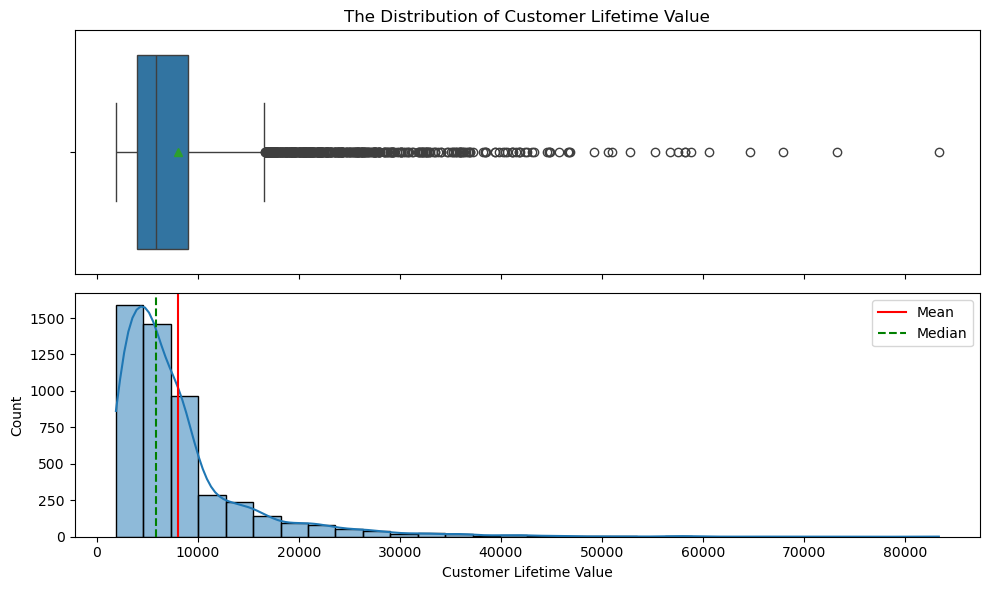

In [13]:
fig, (ax_box, ax_hist) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
sns.boxplot(data=data, x='Customer Lifetime Value', ax=ax_box, showmeans=True)
sns.histplot(data=data, x='Customer Lifetime Value', ax=ax_hist, bins=30, kde=True)
ax_hist.axvline(data['Customer Lifetime Value'].mean(), color='red', linestyle='-', label='Mean')
ax_hist.axvline(data['Customer Lifetime Value'].median(), color='green', linestyle='--', label='Median')
ax_hist.legend()
ax_box.set_title('The Distribution of Customer Lifetime Value')
ax_hist.set_xlabel('Customer Lifetime Value')
ax_hist.set_ylabel('Count')
plt.tight_layout()
plt.show()

In [14]:
# Check the skewedness of the data
print(f'The skewness of the Customer Lifetime Value is {data["Customer Lifetime Value"].skew():.2f}.')

The skewness of the Customer Lifetime Value is 3.11.


In [15]:
# Check quantiles values
q1 = data['Customer Lifetime Value'].quantile(0.25)
q3 = data['Customer Lifetime Value'].quantile(0.75)

# Check upper boundaries
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr

print(f'Most Customer Lifetime Value are between {round(data['Customer Lifetime Value'].min())} and {round(upper_limit)}')

Most Customer Lifetime Value are between 1898 and 16625


Observations: 
- Customer Lifetime Value distribution is highly right-skewed after 10000 with a righ long tail and 2.45 skewness score
- The boxplot also shows us that there are a lot of outliers with value in range 16561-83325.38119 (max value)
- The outliers range has huge gap. This show us that there are also extreme outliers that could be a challenge for our model to learn about the data and predict
- This distribution tells us that even though most customer has CLV value in 1898-16561, there are really loyal customers that contributed to the company
- Customer Lifetime Value will be our targeted features and this highly right-skewed could be a big troubled to our model to accurately predicting. So, we need to transform Customer Lifetime Value in to log transformation

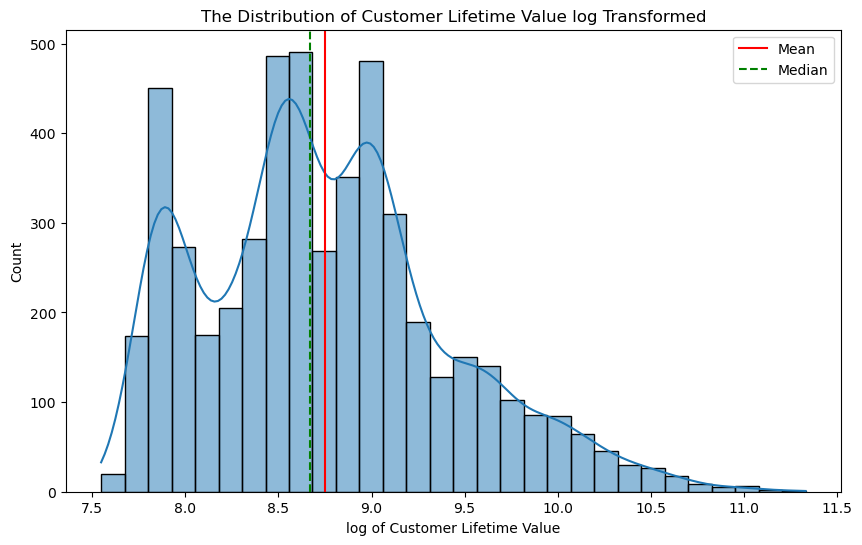

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log(data['Customer Lifetime Value']), bins=30, kde=True)
plt.axvline(np.log(data['Customer Lifetime Value']).mean(), color='red', linestyle='-', label='Mean')
plt.axvline(np.log(data['Customer Lifetime Value']).median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.title('The Distribution of Customer Lifetime Value log Transformed')
plt.xlabel('log of Customer Lifetime Value')
plt.ylabel('Count')
plt.show()

In [17]:
# Check the skewness 
print(f'The skewness of the log transformed Customer Lifetime Value is {np.log(data["Customer Lifetime Value"]).skew():.2f}.')

The skewness of the log transformed Customer Lifetime Value is 0.57.


We can see, that the distribution of log transform in Customer Lifetime Value is better than the original. The skewedness also reduce a lot from 3.11 in to 0.57. So, we will used this log transformation in to modeling and inversed it again to interpret the result. 

**Outliers**

In [18]:
# Checking for outliers
CLV_outliers = data[data['Customer Lifetime Value']>=upper_limit]

print(f'The outliers of Customer Lifetime Value is above {upper_limit} that is about {round(CLV_outliers.shape[0]/data.shape[0]*100, 2)}%.')

The outliers of Customer Lifetime Value is above 16624.75007525 that is about 8.89%.


In [19]:
# Extreme outliers
extreme_outliers = data[data['Customer Lifetime Value']>=upper_limit*2]

print(f'The extreme outliers of Customer Lifetime Value is above {upper_limit*2} that is about {round(extreme_outliers.shape[0]/data.shape[0]*100, 2)}%.')

The extreme outliers of Customer Lifetime Value is above 33249.5001505 that is about 1.43%.


Observations:
- There are 8.68% of outliers with normal upper bound limit, so we can't drop them because we will loss many information about the dataset and make it too exclusive
- But, if check the extreme ouliers that has value 2 times of the upper bound, there are only 1.43% rows. So, we could drop this extreme outliers to reduce the challenge to our model later

In [20]:
# Drop extreme outliers
data = data.drop(extreme_outliers.index)
print(f'This dataset contains {data.shape[0]} rows and {data.shape[1]} columns after removing extreme outliers.')

This dataset contains 4979 rows and 11 columns after removing extreme outliers.


### Numerical Column Analysis and the Correlation with Customer Lifetime Value

In [21]:
numerical_features = ['Monthly Premium Auto', 'Total Claim Amount', 'Income']
categorial_features = ['Number of Policies', 'Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus', 'Marital Status', 'Education']

In [22]:
def numerical_vis(col):
    fig, axs = plt.subplots(1,3, figsize=(18, 6))

    #boxplot for outliers
    sns.boxplot(data=data, x=col, ax=axs[0], showmeans=True)
    axs[0].set_title(f'The Boxplot of {col}')
    axs[0].set_xlabel(col)
    
    #barplot for distribution
    sns.histplot(data=data, x=col, ax=axs[1], bins=30, kde=True)
    axs[1].set_title(f'The Distribution of {col}')
    axs[1].set_xlabel(col)
    axs[1].set_ylabel('Count')
    axs[1].axvline(data[col].mean(), color='red', linestyle='-', label='Mean')
    axs[1].axvline(data[col].median(), color='green', linestyle='--', label='Median')
    axs[1].legend()

    #lineplot for correlation with Customer Lifetime Value
    sns.scatterplot(data=data, x=col, y='Customer Lifetime Value', ax=axs[2])
    axs[2].set_title(f'The Correlation of {col} with Customer Lifetime Value')
    axs[2].set_xlabel(col)
    axs[2].set_ylabel('Customer Lifetime Value')
    axs[2].legend()
    
    plt.suptitle(f'The Visualization of {col}')
    plt.tight_layout()
    plt.show()

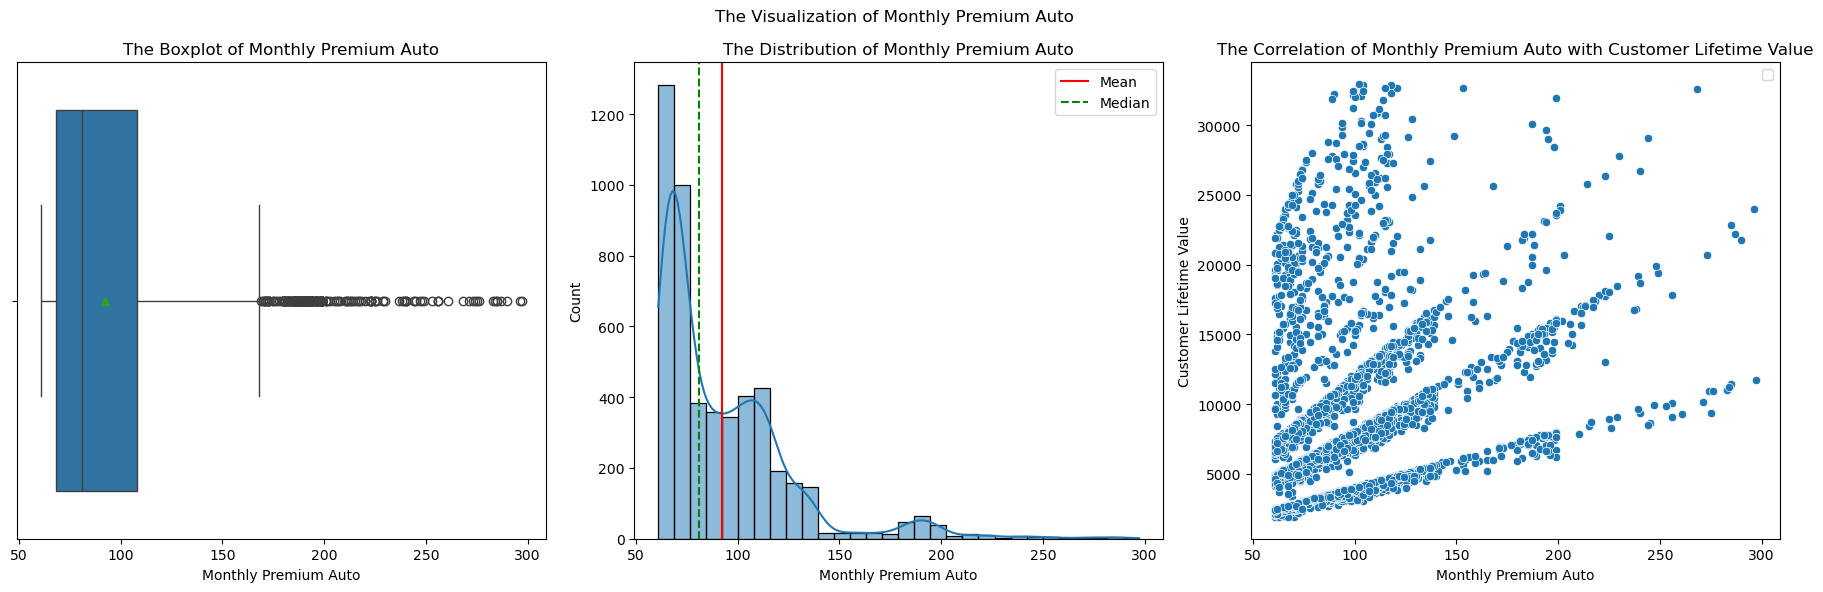

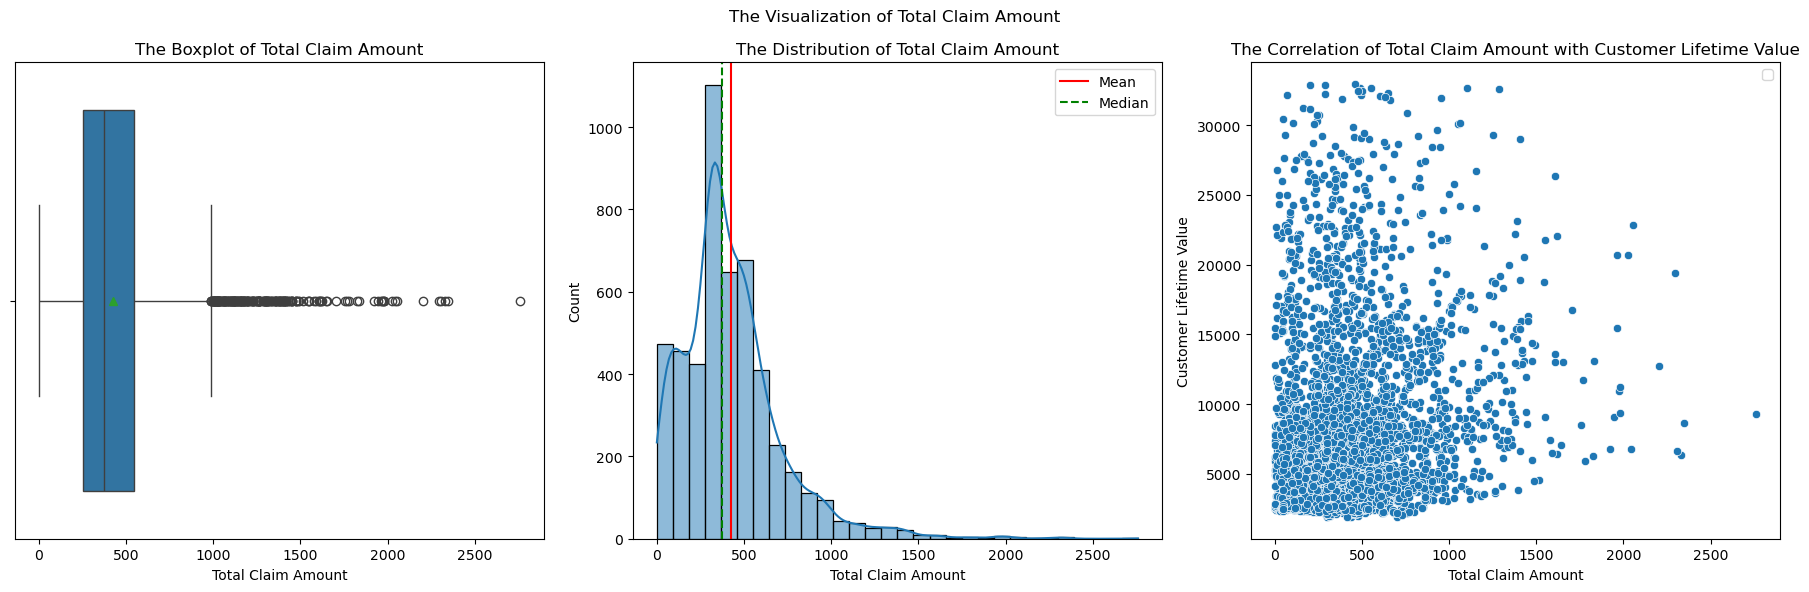

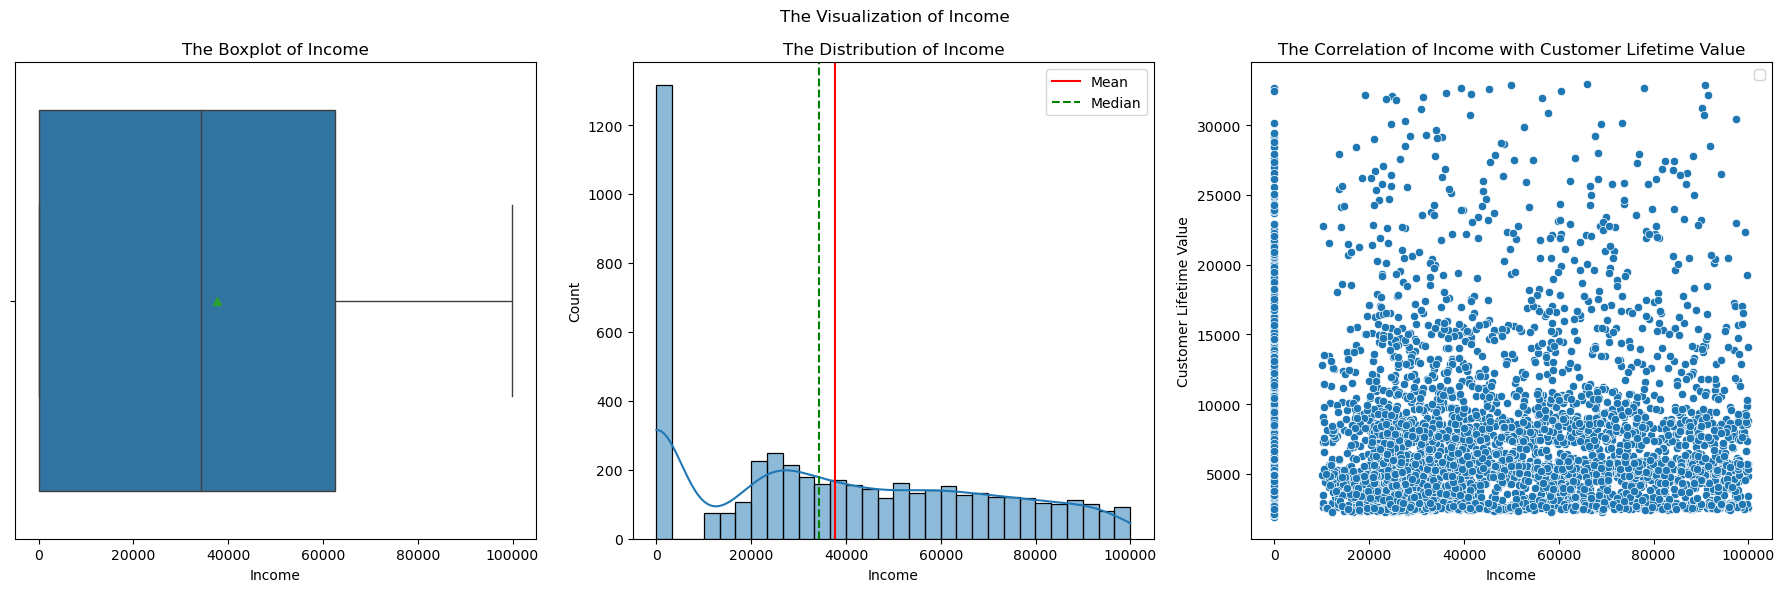

In [23]:
for col in numerical_features:
    numerical_vis(col)

Observations:
- Monthly Premium Auto and Total Claim Amount distribution is right-skewed and have many outliers on the upper end that confirmed from both of their histogram and boxplot. In Monthly Premium Auto there are a huge drop near 150. In other way, Income distribution have no outliers with almost uniformly distributed unless the 0 Income. 
- Income features has interesting distribution that shows us that the number of Unemployed customer with 0 income is more than another value income. This unempoyed customer also has the lowest until highest Customer Lifetime Value score
- Compared to Customer Lifetime Value, the scatter plot shows clear clusters of data, and a general upward trend — suggesting a positive correlation between Monthly Premium Auto and Customer Lifetime Value (CLV). So, this feature is potentially valuable for predicting CLV.. Total Claim Amount probably has correlation with Customer Lifetime Value, but the pattern wasn't really clear. For the income, probably has no correlation with Customer Lifetime Value because there are no pattern in the scatter plot
- The scaterplot also show us that the farther the data points are from the dense cluster (center/mode of the distribution), the more sparse and scattered they become. These points likely represent residual outliers, after we removed the extreme outliers. Eventhough we can't do anything about this, we need to awared that this outliers could be affects our model quality

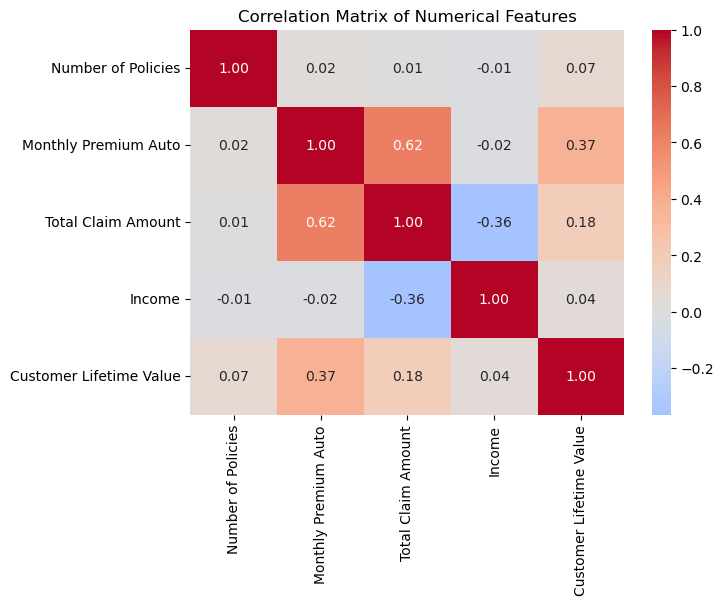

In [24]:
plt.figure(figsize=(7, 5))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Observations:
- Align with the scatterplot above, the most correlated features with Customer Lifetime Value is Monthly Premium Auto with positively correlation. But, Customer Lifetime Value Correlations Are Weak Overall. Even the strongest correlation with CLV (0.37 from Monthly Premium Auto) is relatively low. This suggests that CLV is influenced by multiple weaker factors or perhaps complex interactions, rather than being strongly driven by any single numerical variable.
- Features that has the most correlation are Monthly Premium Auto and Total Claim Amount with 0.62 correlation score. This correlation score tells us that the higher Premium that customer choose is based on the higher Claim ceiling and these two features slighlt impacted to Customer Lifetime Value score. But, this correlation score may lead to multicollinearity. So, we need to check their VIF score before doing modeling
- Another interesting insight, Total Claim Amount and Income are negatively correlated with 0.36 correlation score which means the lower of customer income, the higher their total claim amount. This negative score correlation probably being effected by the huge number of unemplyed customer with 0 Income


### Categorical Column Analysis and the Correlation with Customer Lifetime Value

In [25]:
def categorical_vis(col):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5), sharex=True)
    sns.countplot(data=data, x=col, ax=ax1, palette='Set2')
    ax1.set_title(f'The Count of {col}')
    ax1.set_xlabel(col)
    ax1.set_ylabel('Count')

    sns.boxplot(data=data, x=col, y='Customer Lifetime Value', ax=ax2, palette='Set2')
    ax2.set_title(f'The Comparison of {col} with Customer Lifetime Value by {col}')
    ax2.set_xlabel(col)
    ax2.set_ylabel('Customer Lifetime Value')
    plt.legend()
    plt.xlabel(col)
    plt.show()

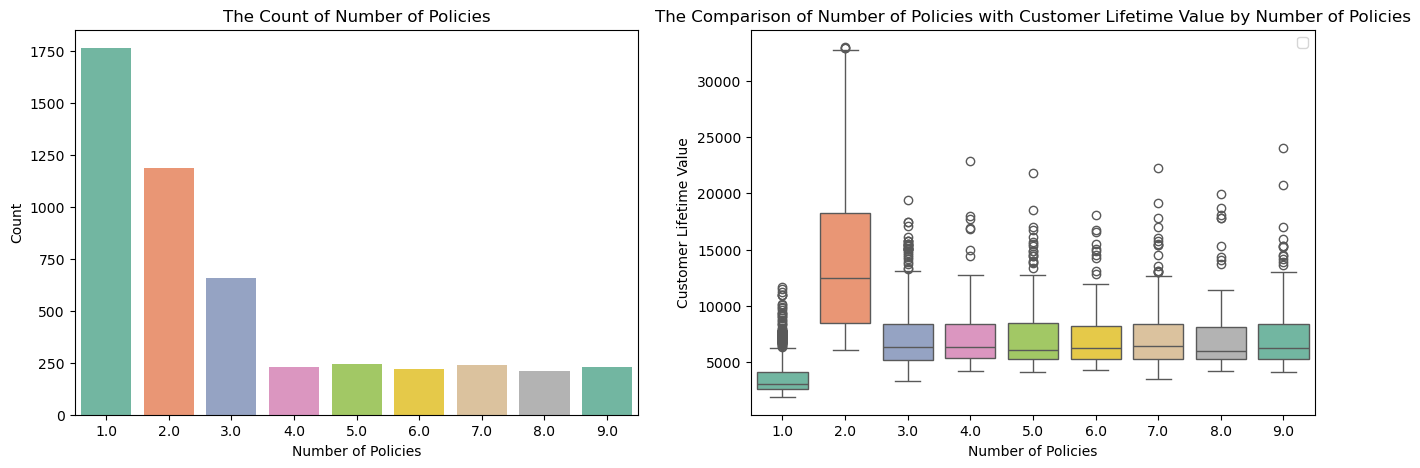

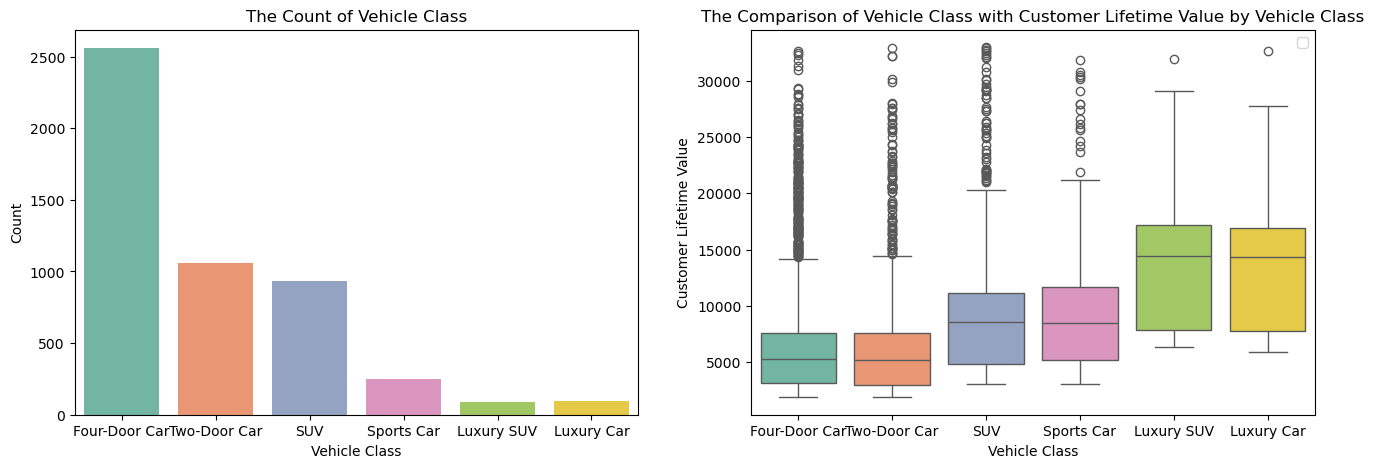

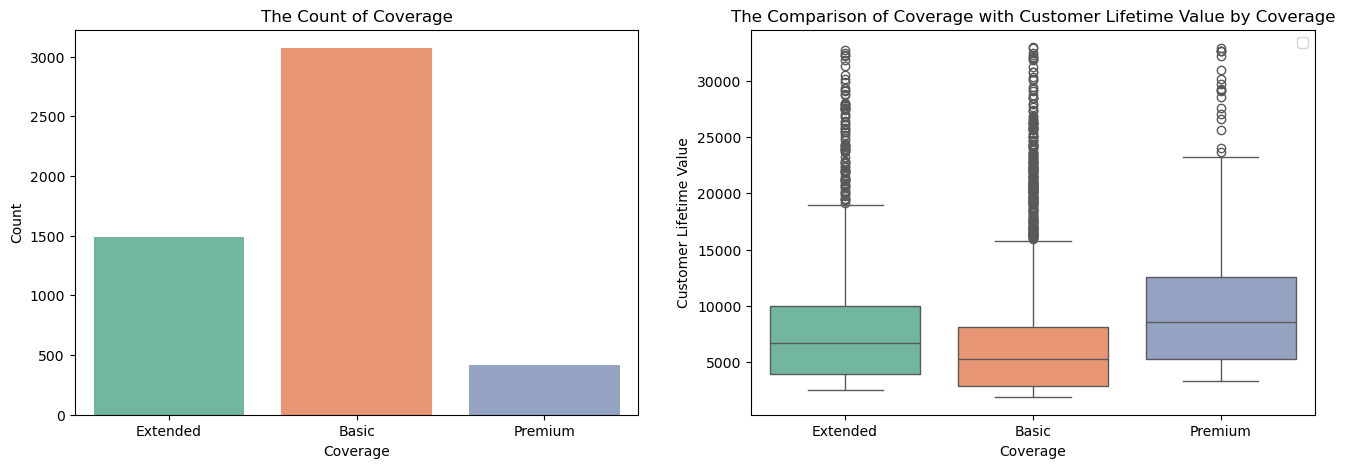

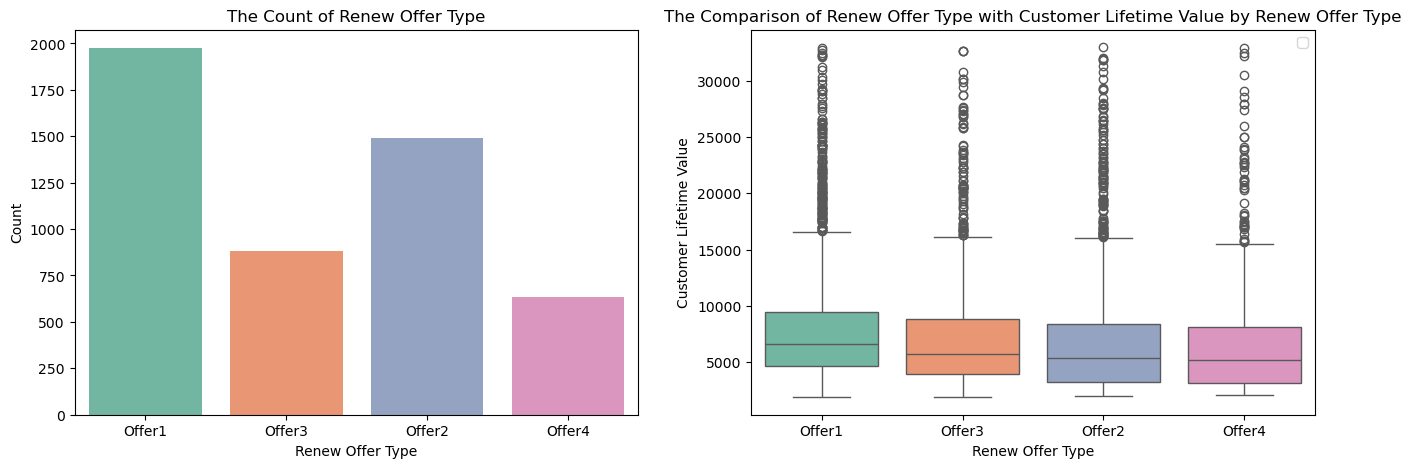

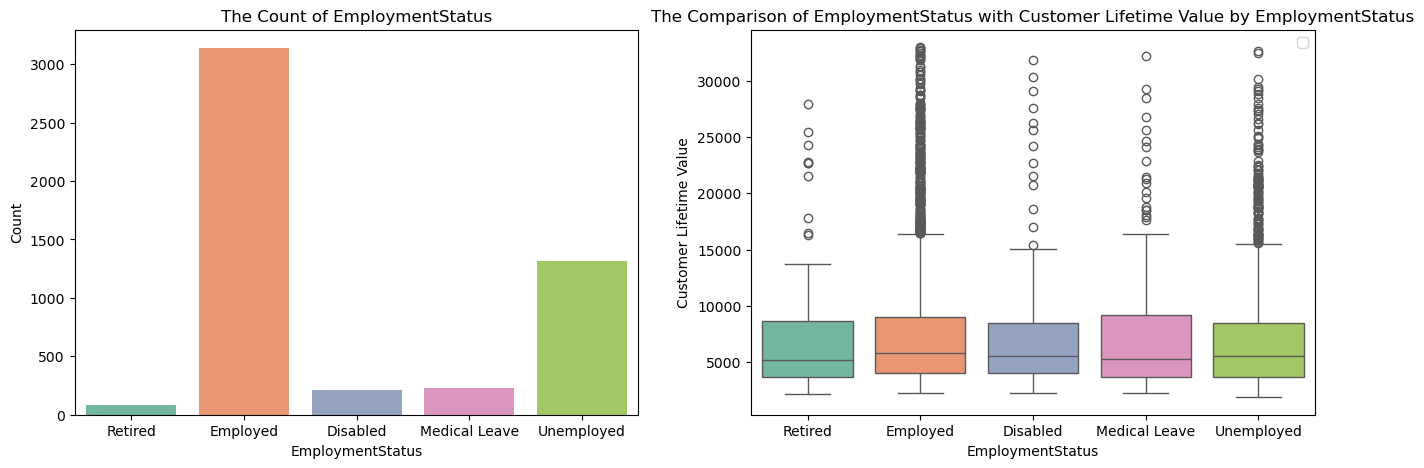

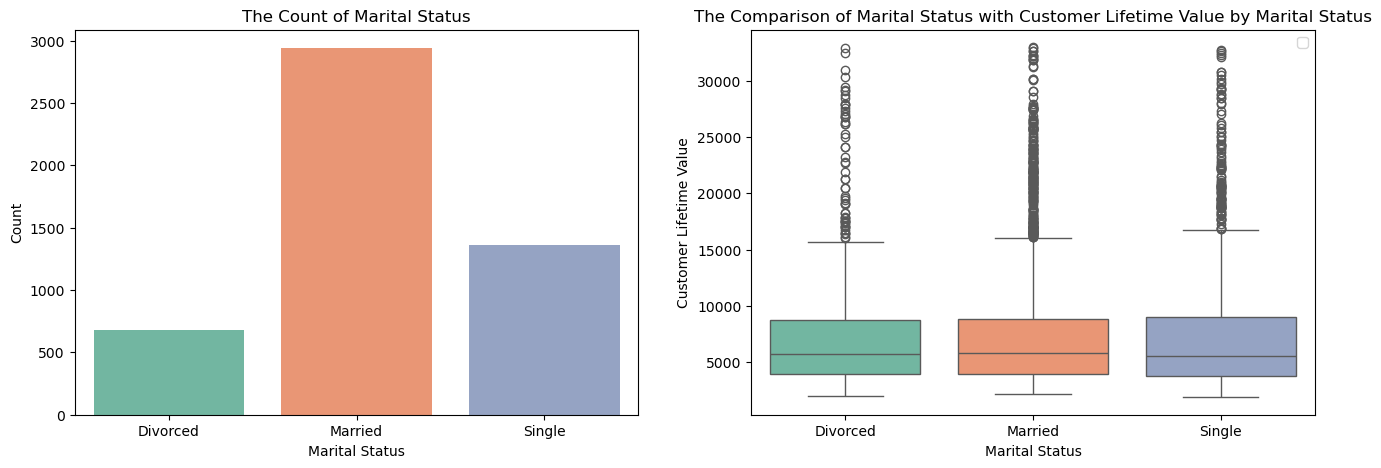

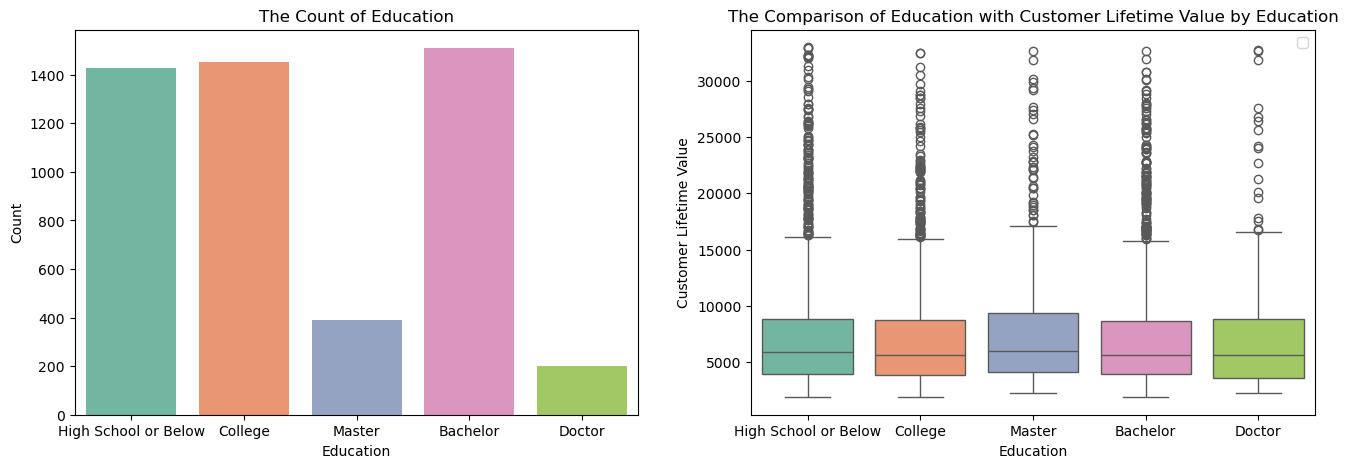

In [26]:
for col in categorial_features:
    categorical_vis(col)

In [27]:
from scipy.stats import kruskal

In [28]:
for col in categorial_features:
    groups = [group['Customer Lifetime Value'].values 
              for _, group in data.groupby(col)]

    # Perform Kruskal-Wallis H-test
    stat, p = kruskal(*groups)

    if p < 0.05:
        print(f'We reject the H0. The mean of Customer Lifetime Value on {col} is significantly different with p-value: {p:.4f}.')
    else:
        print(f'We fail to reject the H0. The mean of Customer Lifetime Value on {col} is NOT significantly different with p-value: {p:.4f}.')

We reject the H0. The mean of Customer Lifetime Value on Number of Policies is significantly different with p-value: 0.0000.
We reject the H0. The mean of Customer Lifetime Value on Vehicle Class is significantly different with p-value: 0.0000.
We reject the H0. The mean of Customer Lifetime Value on Coverage is significantly different with p-value: 0.0000.
We reject the H0. The mean of Customer Lifetime Value on Renew Offer Type is significantly different with p-value: 0.0000.
We reject the H0. The mean of Customer Lifetime Value on EmploymentStatus is significantly different with p-value: 0.0005.
We fail to reject the H0. The mean of Customer Lifetime Value on Marital Status is NOT significantly different with p-value: 0.1305.
We fail to reject the H0. The mean of Customer Lifetime Value on Education is NOT significantly different with p-value: 0.1197.


Observations:
- Most customers hold only one policy, with significantly fewer customers holding 2 or more. The frequency sharply declines from 1 to 3, then plateaus from 4 to 9. Interestingly, customers with 2 policies have the highest CLV than they who hold more or less than 2. This suggests that the optimal number of policies for maximizing CLV is 2. This support with the The Kruskal-Wallis test output. The Kruskal-Wallis test confirms that differences in CLV across policy counts are statistically significant. Most categories has many outliers, indicating that some customers in every group yield much higher CLV than the group average.
- The majority of customers own Four-Door Cars vehicle class, followed by Two-Door and SUV types. While CLV distributions appear similar across classes, Luxury SUV and Luxury Car categories exhibit fewer outliers and more compact distributions, suggesting a more consistent CLV in higher-end segments. Despite visual similarities, the mean CLV across vehicle classes is statistically significantly different, indicating underlying distinctions in customer value.
- Most customers choose Basic Coverage, followed by Extended and Premium. The CLV distribution is skewed across all three, with Basic Coverage showing the highest number of outliers. The mean CLV differs significantly between group, implying that the coverage level is related to customer value — possibly reflecting risk preferences or customer retention patterns. 
- Employed customers dominate the dataset, with Unemployed customers being the second largest group. These two groups show more outliers, while other employment categories (e.g., Retired, Medical Leave) exhibit lower and more stable CLV. The Kruskal-Wallis test reveals significant CLV differences, suggesting employment status does impact customer value — likely due to related economic behavior.
- Most customers are Married, followed by Single and Divorced. Although the distribution includes many outliers across all groups, the Kruskal-Wallis test fails to show significant differences in CLV. This suggests marital status alone is not a strong differentiator for customer value.
- Most customers have High School or Below, College, or Bachelor’s education levels. The CLV distributions look relatively similar, with many outliers across the values. Statistically, there’s no significant difference in mean CLV between education levels, indicating education is not a strong standalone predictor of CLV.

**The Correlation between CLV and Monthly Premium Auto**

In [29]:
def CLV_vs_premium (hue):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x='Monthly Premium Auto', y='Customer Lifetime Value', hue=hue)
    plt.title(f'The Correlation of Monthly Premium Auto with Customer Lifetime Value by {hue}')
    plt.xlabel('Monthly Premium Auto')
    plt.ylabel('Customer Lifetime Value')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.show()

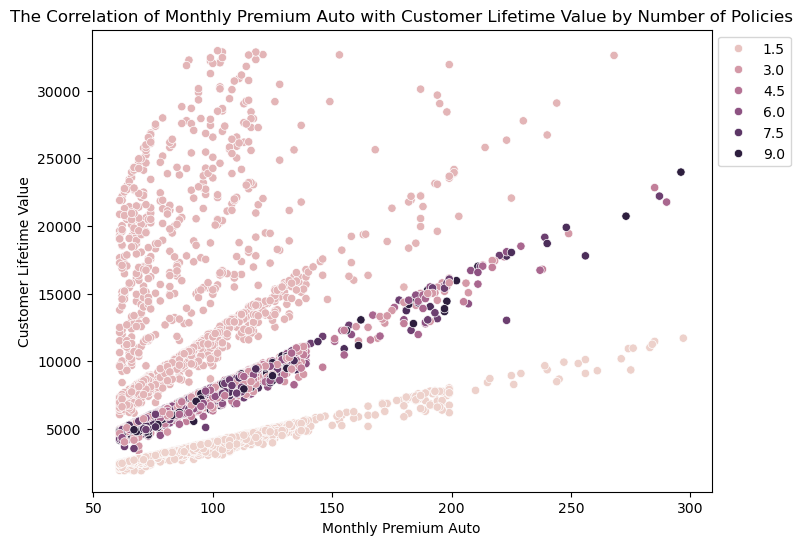

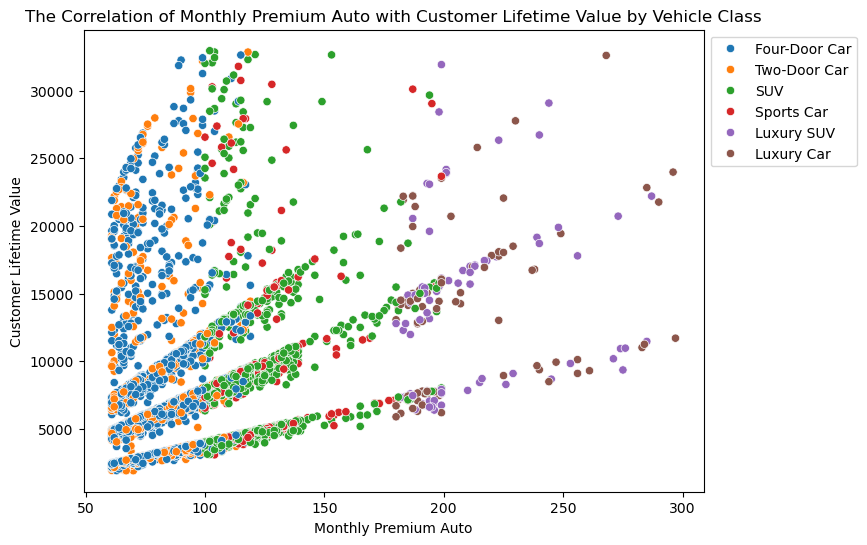

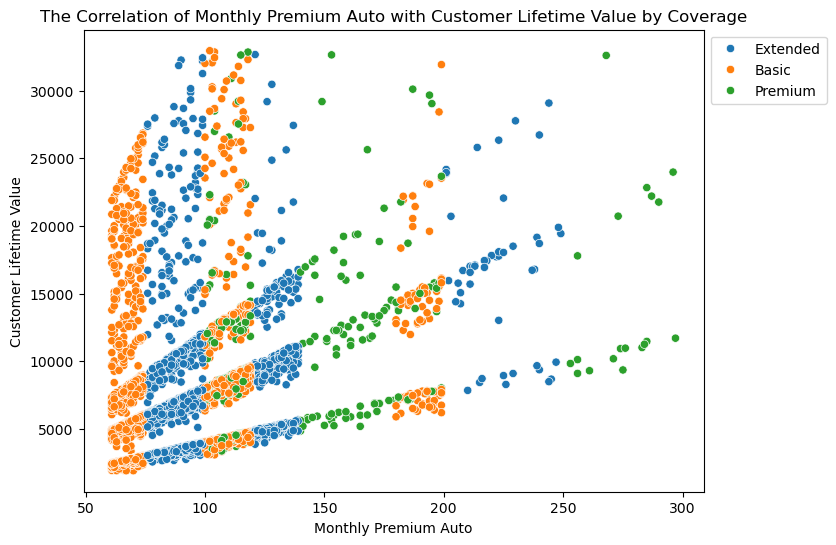

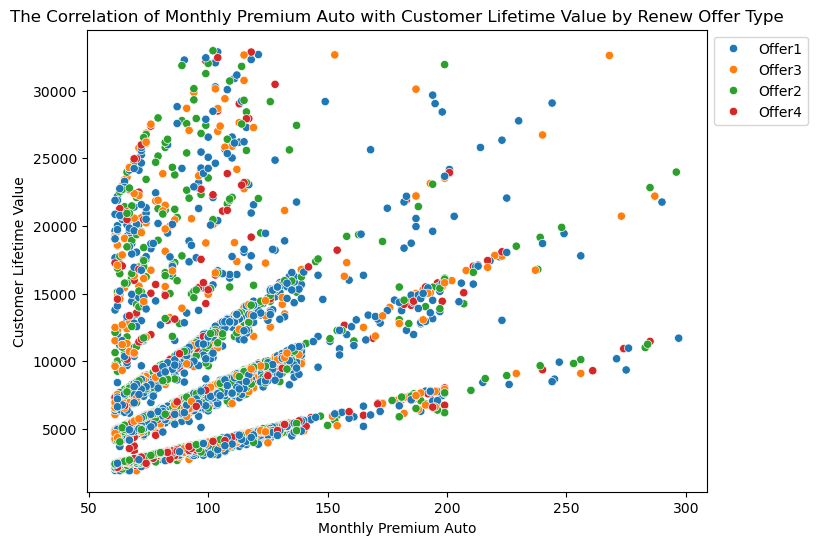

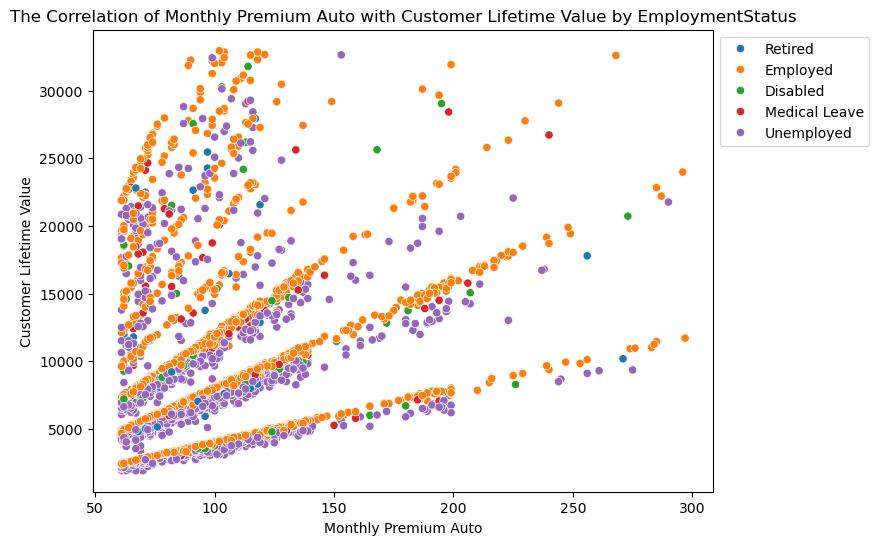

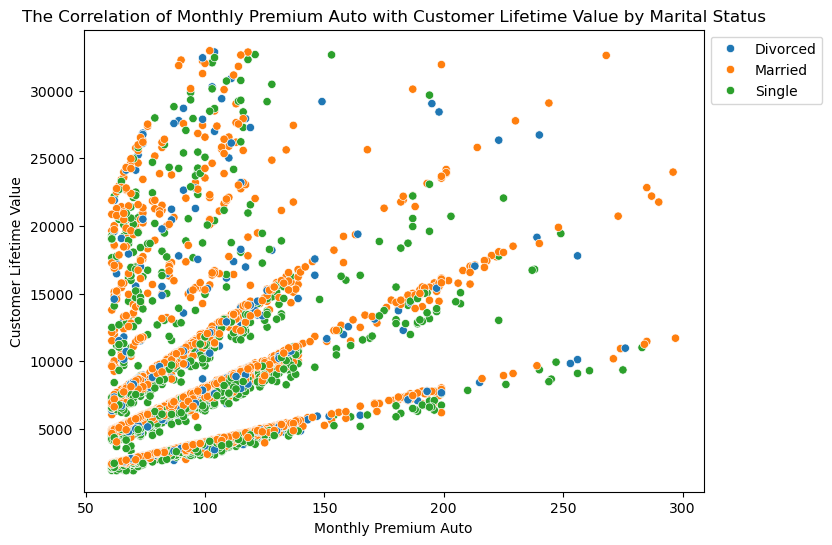

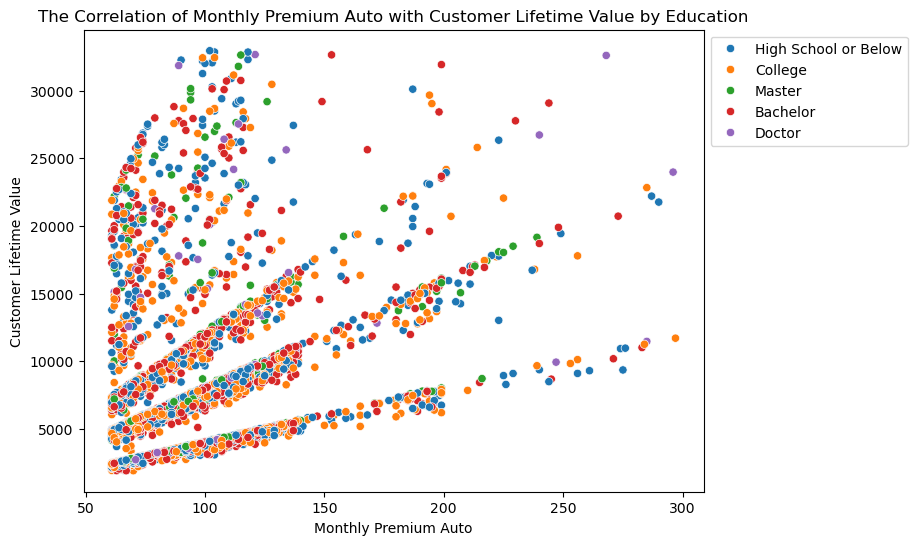

In [30]:
for col in categorial_features:
    CLV_vs_premium(col)

Observations:
1. Customer LIfetime Value vs Monthly Premium Auto: The scatterplots of form distinct some linear bands, which implies that CLV increases with Monthly Premium Auto and the same Monthly Premium Auto value could have more than one possibility CLV. This is a common phenomenon where higher Monthly Premium Auto payments are generally associated with higher CLV because intuitively, as customers paying more are likely buying higher-value or longer tenure.
2. Number of Policies: Customers holding 1 policy dominate the dataset numerically but tend to have lower CLV. Interestingly, the highest CLV values are observed among customers with exactly 2 policies, suggesting that this group may contain high-value policy combinations or demonstrate strong loyalty. Customers with 3 or more policies fall in the mid-to-high CLV range but do not surpass the 2-policy group in top value. This supports the Kruskal-Wallis test, which found the CLV distribution across different policy counts to be significantly different. So, we can conclude that more policies do not always guarantee higher value. Optimal bundling around 2 policies may provide the best balance of customer commitment and profitability. These customers could be ideal for retention and upsell strategies.
3. Vehicle Class: Lower Monthly Premiums are dominated by Four-door and Two-door cars, while SUVs and Sports Cars appear in the middle range. Luxury Cars and Luxury SUVs cluster at the highest premium levels. However, CLV ranges are broad across all classes, suggesting vehicle class alone does not strongly predict CLV. We can see that vehicle class impacts premium, but not necessarily lifetime value. Luxury-class customers may pay more monthly but could have shorter tenures or less engagement that doesn't ensure they will definitely have higher CLV score.
4. Coverage: There’s an observable pattern in Monthly Premium Auto distribution across coverage types (Basic, Extended, Premium). However, all three coverage levels appear across low to high premium bands, and CLV is highly varied within each type. This suggests that coverage type alone isn’t a reliable driver of CLV. Coverage level likely interacts with other hidden features (e.g., vehicle value, risk scores). A deeper feature interaction analysis (e.g., via a model) may be necessary to isolate impact.
5. Employement Status: A clear vertical pattern thas is visible is Unemployed customers tend to fall at the lower end of CLV and Monthly Premium Auto. Employed customers occupy the upper range, with other statuses (e.g., Retired, Medical Leave) interspersed in between. Employment status is a useful customers demographic for stability and long-term value. Employed customers may be more consistent payers and should be prioritized in engagement strategies.
6. Married Status: A similar pattern to employment in married status is Single individuals tend to cluster at lower CLV levels, while Married customers tend to appear in higher bands. Divorced individuals are distributed between them. Marital status may signal life stage and financial stability. Married individuals could represent lower churn risk and greater long-term potential.
7. Educations and Renew Offer Type: No strong pattern emerges for either Education Level or Renew Offer Type in the CLV–Monthly Premium relationship. This is consistent with the non-significant Kruskal-Wallis results for these features. These features may have limited influence on CLV or may only matter in combination with other features.

**The Correlation between CLV and Income**

In [31]:
def CLV_vs_income (hue):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x='Income', y='Customer Lifetime Value', hue=hue)
    plt.title(f'The Correlation of Income with Customer Lifetime Value by {hue}')
    plt.xlabel('Income')
    plt.ylabel('Customer Lifetime Value')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.show()

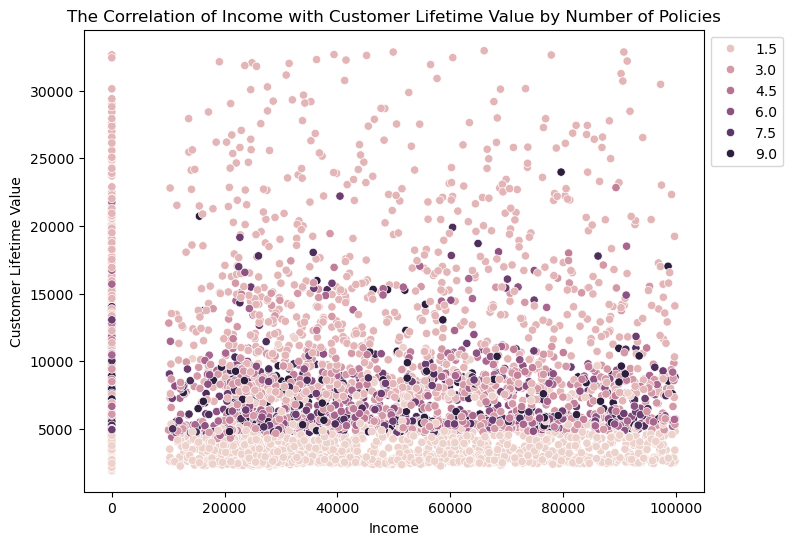

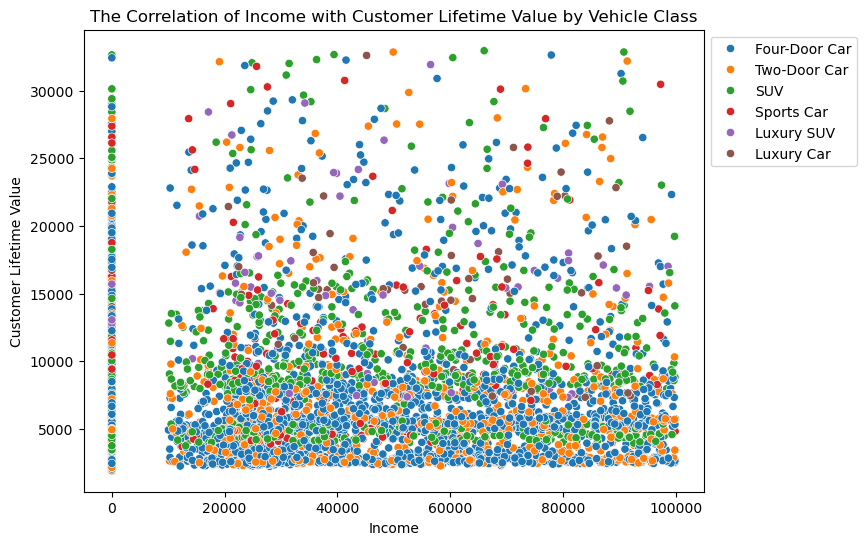

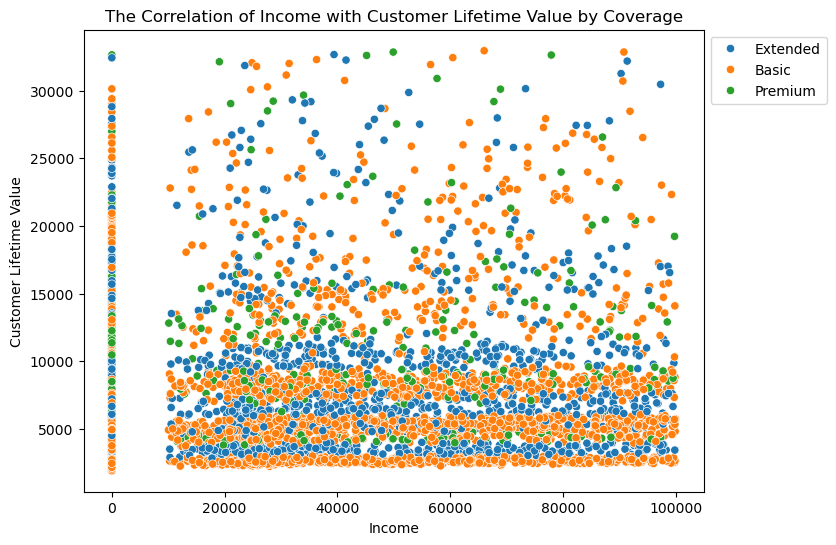

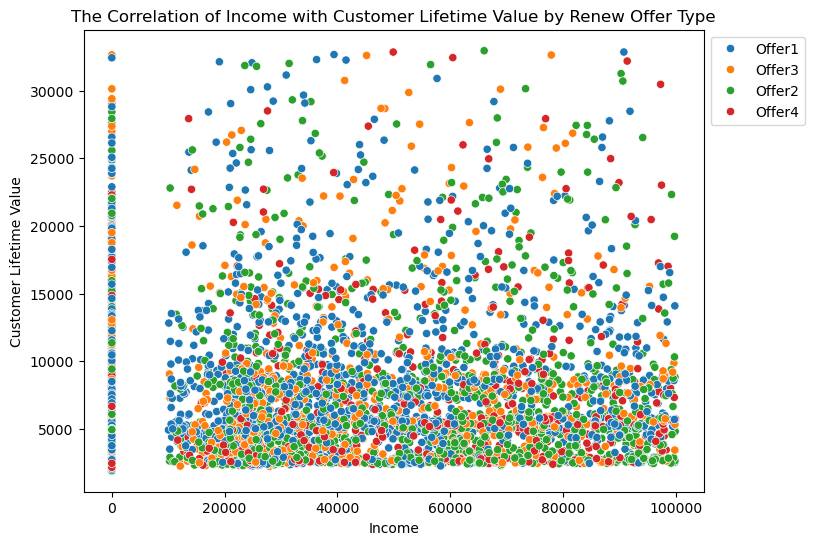

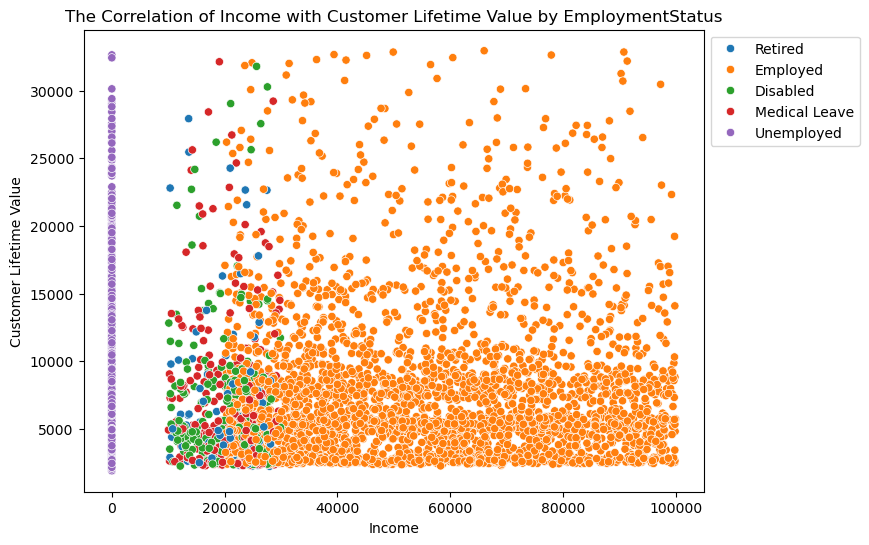

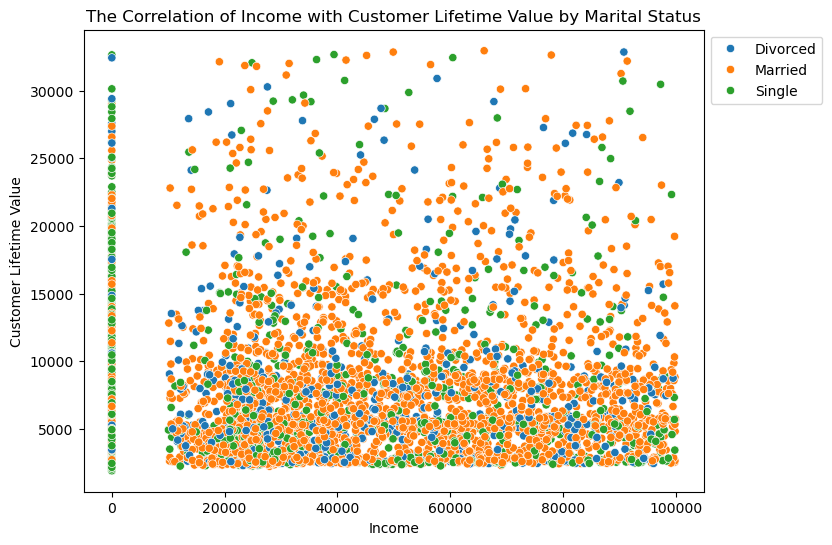

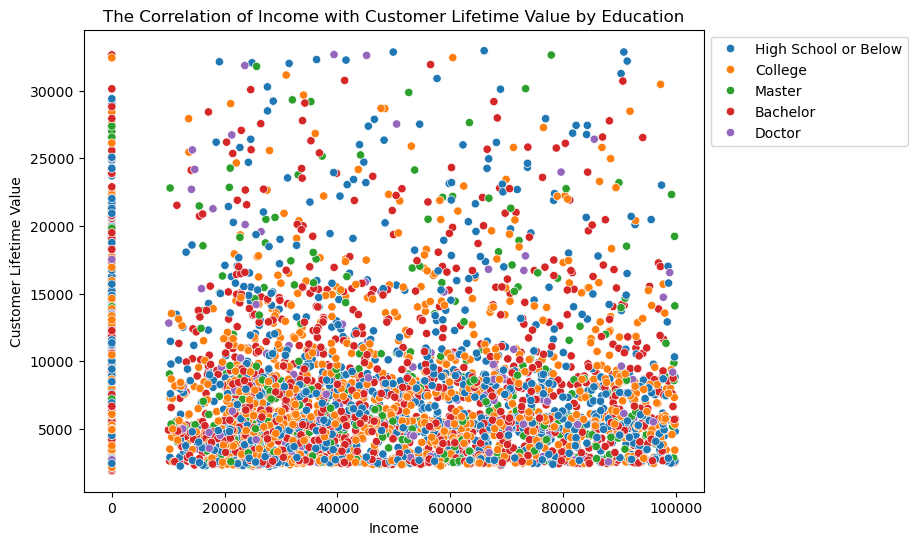

In [32]:
for col in categorial_features:
    CLV_vs_income(col)

Observations: 
1. Customer Lifetime Value vs Income: There is no clear linear correlation between Income and CLV. A large horizontal cluster is visible for zero income individuals, suggesting a significant customer group with no reported earnings. Most customers, regardless of income, are concentrated in the lower CLV range. As CLV increases, the distribution becomes sparser, indicating that high CLV is relatively rare across all income levels. So, we can say that Income alone is not a strong indicator of customer value. This reinforces the importance of considering behavioral features (e.g., product usage, tenure) over just demographic data.
2. Number of Policies: Across income levels, customers hold all possible numbers of policies, indicating no direct relationship between income and number of policies. However, the lowest CLV tier is consistently associated with customers holding only 1 policy. Customers with 3+ policies often still sit in the lower-to-middle CLV range. 
3. Coverage: All coverage types appear across the income spectrum. As in earlier plots, some clustering patterns exist—certain income and coverage combinations form distinguishable bands in the CLV range.
4. Employement Status: This is the clearest categorical factor influencing the Income–CLV relationship. Customers with zero income are Unemployed. Lower-income segments include Retired, Disabled, and those on Medical Leave. Employed individuals span the medium to high income ranges and are also distributed across a wide range of CLV.
5. Vehicle CLass, Renew Offer Type, Marital Status, and Education : These categories do not reveal any distinct visual patterns in the Income–CLV relationship. Data points from different categories are widely mixed across the income and CLV spectrum. 

**The Correlation between CLV and Total Claim Amount**

In [33]:
def CLV_vs_claim (hue):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x='Total Claim Amount', y='Customer Lifetime Value', hue=hue)
    plt.title(f'The Correlation of Total Claim Amount with Customer Lifetime Value by {hue}')
    plt.xlabel('Total Claim Amount')
    plt.ylabel('Customer Lifetime Value')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.show()

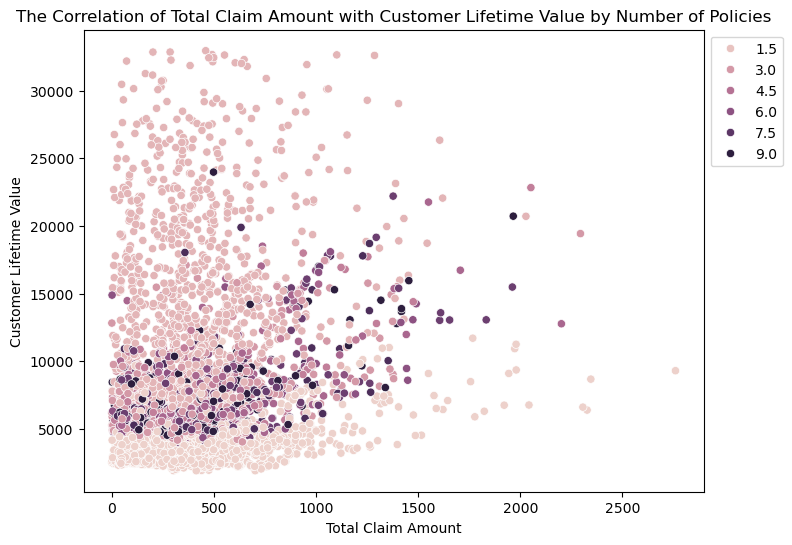

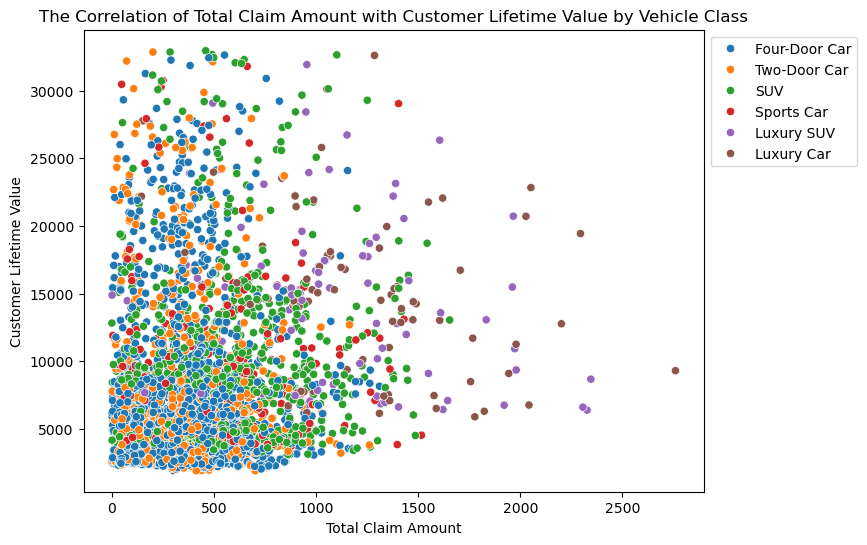

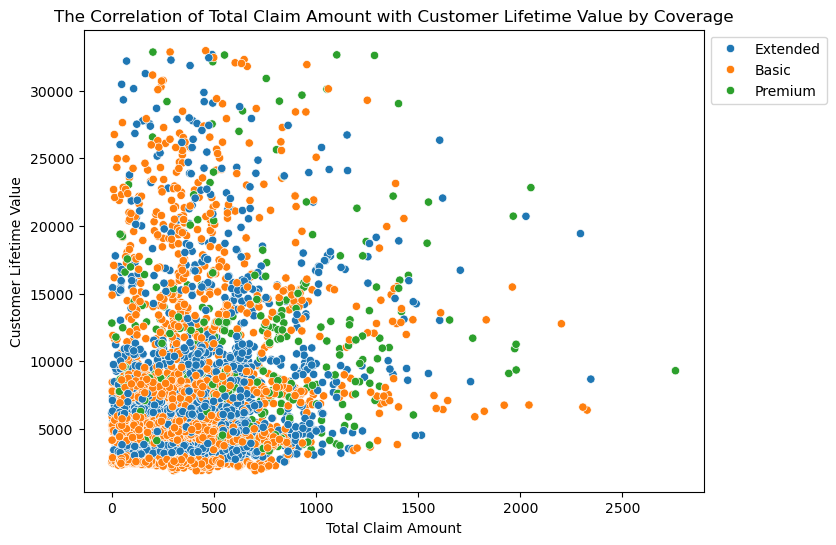

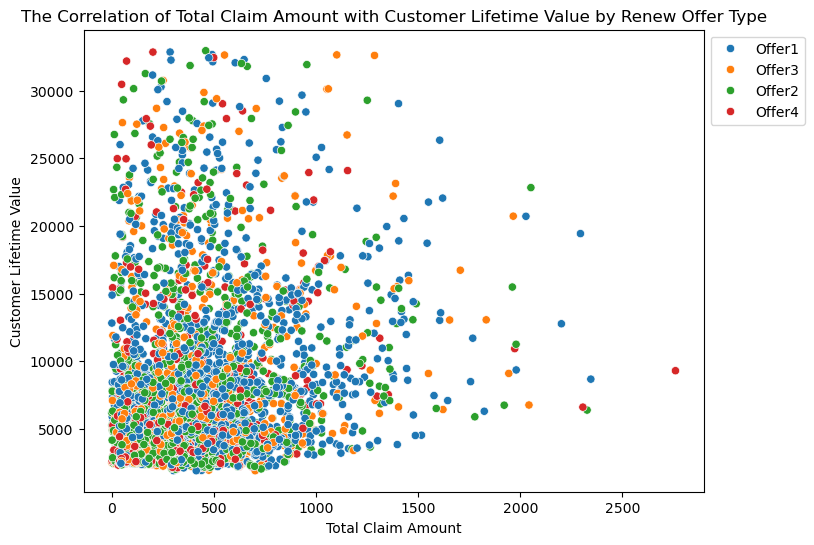

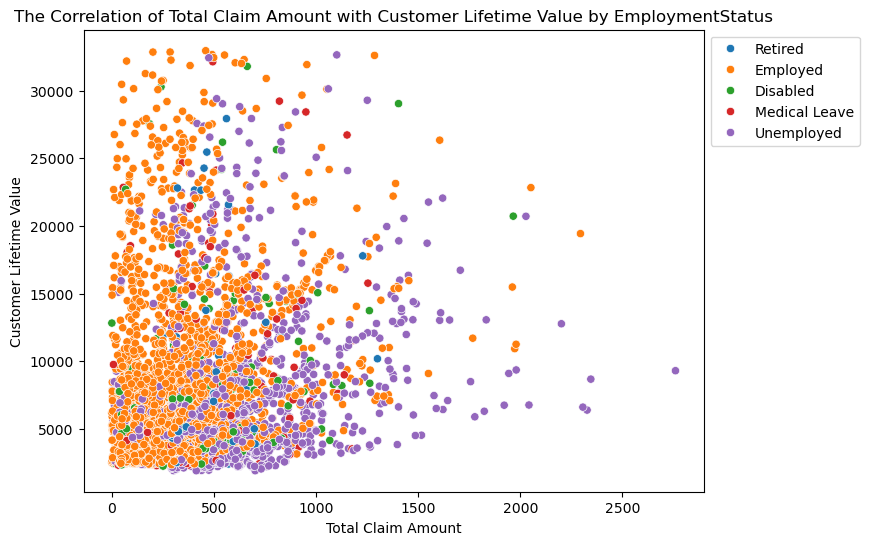

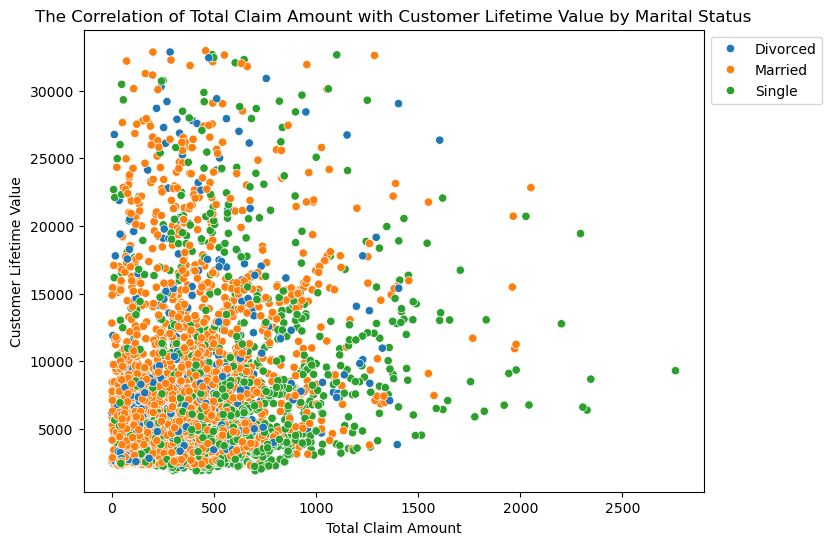

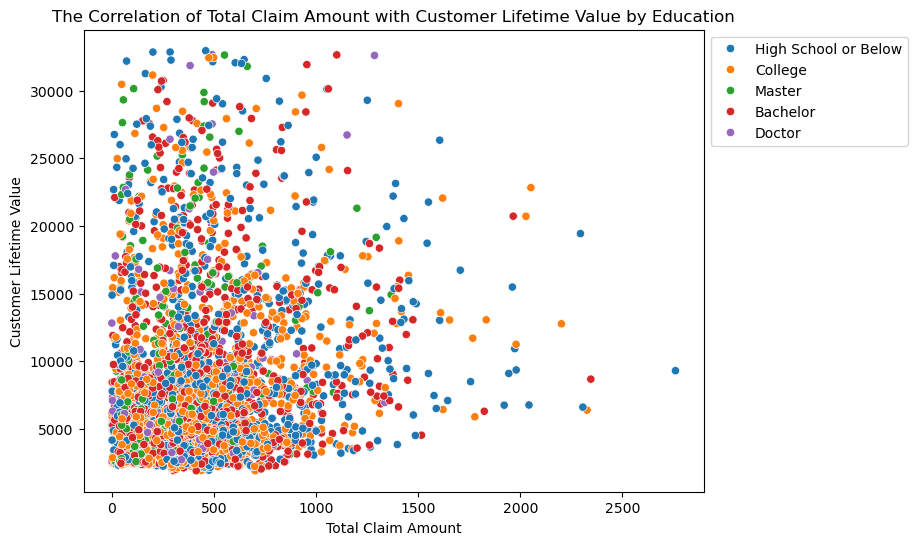

In [34]:
for col in categorial_features:
    CLV_vs_claim(col)

Observations:
1. Customer Lifetime Value vs Total Claim Amount: The relationship appears positively skewed but non-linear. Most customers fall within a dense cluster at low Total Claim Amounts and low CLV (bottom-left), indicating that the majority of the customer base makes small claims and brings in relatively modest lifetime value. As Total Claim Amount increases, the dispersion of CLV widens, suggesting that customers with larger claims may either be high-value or anomalous — potentially due to different policy types, loyalty, or claim behavior. This indicates that claim volume alone doesn’t guarantee high CLV — some high-claim customers still fall into the mid-range of CLV, implying other factors contribute more directly to lifetime value.
2. Number of Policies: The correlation between Total Claim Amount and number of policies is weak — customers across all policy counts are scattered over various claim amounts. However, the stratified banding of CLV by policy count still remains clearly visible which are customers with 1 policy consistently cluster at the bottom (lowest CLV), those with 2 policies represent the highest band of CLV, and customers with 3 or more policies fall into the second tier.
3. Coverage: Coverage type does not exhibit a clear pattern with Total Claim Amount, as all coverage tiers (Basic, Extended, Premium) appear across the spectrum. However, consistent with prior findings, Coverage shows banding along the CLV axis — Premium and Extended coverages tend to align with higher CLV, although not exclusively. 
4. Employement Status: A subtle pattern emerges about Employement Status in Total Claim Amount-CLV correlation which Employed customers are concentrated in the low Total Claim Amount range that likely reflecting more cautious or consistent insurance behavior and Other groups like Retired, Disabled, or Unemployed are more spread out into medium and higher claim amounts. This could reflect different usage profiles or risk levels tied to employment status.
5. Vehicle CLass, Renew Offer Type, Marital Status, and Education : These features do not display any clear visual pattern or segmentation in relation to either Total Claim Amount or CLV. Their data points are widely dispersed, implying they may not significantly influence claim behavior or value.

### Modeling

#### Data Preparation

Before building predictive models, it is essential to properly prepare the dataset to ensure the model can learn effectively and produce reliable results. These are the following steps of the data preparation process that will be done:
1. The first step is to clearly identify the target variable (Customer Lifetime Value) and the independent features (predictor variables) that will be used for prediction.
2. Then, we need to split them as train and test set with 70-30 proportion.
3. To ensure the model learns from distinct information, we assess multicollinearity among predictor variables using the Variance Inflation Factor (VIF). Features with a VIF score below 4 are considered ideal. Scores between 4 and 10 indicate moderate multicollinearity and require closer scrutiny. Highly collinear features can distort model interpretation and reduce performance, so this step helps us select independent and meaningful predictors. 
4. The numerical variables (Monthly Premium Auto, Total Claim Amount, and Income) have high magnitude values and are notably skewed, with the presence of outliers. To normalize their scales and reduce the impact of outliers, we apply Robust Scaling. This method centers and scales features using statistics that are robust to outliers (median and IQR), ensuring they are on a similar scale as the encoded categorical features (e.g., 0 or 1 values).
5. From exploratory analysis, we observed that all numerical features and the target variable is right-skewed distributions and the bivariate scatterplots gave evidence of non-linear relationships.
6. Categorical variables are encoded based on their nature. One-Hot Encoding is applied to Vehicle Class, Renew Offer Type, Employment Status, and Marital Status, as these are nominal categories with no inherent order. Ordinal Encoding is used for Coverage and Education, since their values imply a hierarchy meaning.

**Declare Target Variable and Predictor Variables**

In [35]:
#Define the features and target variable
X = data.drop(columns=['Customer Lifetime Value'])
y = data['Customer Lifetime Value']

**Splitting Dataset into Train and Test Set**

In [36]:
#Data splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Check multicollinearity**

In [37]:
# Scaling
scaler = RobustScaler()

X_num = X.select_dtypes(include='number')
X_num_scaled = scaler.fit_transform(X_num)  
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns)

In [38]:
#Multicollinearity check
X_num_scaled = add_constant(X_num_scaled)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_num_scaled.values, i) for i in range(X_num_scaled.shape[1])]
vif['Features'] = X_num_scaled.columns
vif = vif[vif['Features'] != 'const']
vif = vif.sort_values(by='VIF', ascending=False)
vif

VIF              Features
3  2.039122    Total Claim Amount
2  1.769208  Monthly Premium Auto
4  1.255787                Income
1  1.000843    Number of Policies

Observations:
- All numerical features have Variance Inflation Factor (VIF) scores below 4, which falls within the commonly accepted threshold indicating no serious multicollinearity.
- Although earlier exploratory analysis showed a strong correlation between Total Claim Amount and Monthly Premium Auto, the VIF results confirm that this correlation does not cause problematic multicollinearity in the model.
- Therefore, none of the numerical predictors need to be excluded, and all are suitable for inclusion in the modeling phase. 

**Build Column Transformer of Data Preprocessing**

In [39]:
# Create a pipeline for numerical features
numerical_pipeline = Pipeline(steps=[
    ('scaler', scaler),
    ('poly', PolynomialFeatures(degree=3, include_bias=False))
])

# Create a pipeline for onehot encoding
onehot_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

#encode categorical variables
ordinal_label = [
    ['Basic', 'Extended', 'Premium'], #Coverage feature
    ['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor']
]

# Create a pipeline for ordinal encoding
ordinal_pipeline = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=ordinal_label))
])

transformer = ColumnTransformer([
    ('numerical', numerical_pipeline, ['Monthly Premium Auto', 'Total Claim Amount', 'Income']),
    ('onehot', onehot_pipeline, ['Vehicle Class','Renew Offer Type', 'EmploymentStatus', 'Marital Status']),
    ('ordinal', ordinal_pipeline, ['Coverage', 'Education'])
], remainder='passthrough')

#### Build Machine Leaning Model

To build an effective machine learning regression model, the following structured process will be followed:
- We begin by comparing a diverse set of regression models. For the base model, we will used Linear Regression, Decision Tree Regressor, and K-Nearest Neighbors Regressor (KNN). For the ensemble model, we will used Random Forest Regressor, Gradient Boosting Regressor, Ada Boosting Regressor, Bagging Regressor, and XGBoost Regressor. For the regularized linear models we will used Lasso Regression (L1 regularization) and Ridge Regressor (L2 regularization). This broad comparison helps us understand which modeling approach best captures the underlying patterns in our data.
- Our target variable is highly right-skewed, which can impact model performance. To address this, we’ll use TransformedTargetRegressor to apply a log transformation to the target during training and automatically inverse transform it for predictions and evaluation
- To ensure consistency and avoid data leakage, we’ll encapsulate preprocessing and modeling steps into a single Pipeline. This includes scaling using RobustScaler, Polynomial feature expansion, onehot encoding for encode nominal categorical variables, ordinal encoding for ordinal categorical variables, and the estimator itself 
- To ensure reliable performance estimates and mitigate overfitting, we apply 5-fold cross-validation during training. This provides a robust indication of model generalizability on unseen data.
- We will evaluate and compare model performance using RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), MAPE (Mean Absolute Percentage Error), and R² Score (Coefficient of Determination). The lower the MAE, RMSE, and MAPE, the better the model’s accuracy. Conversely, a higher R² indicates a better proportion of variance explained by the model. 
- Once the best-performing model is identified based on cross-validation metrics, we proceed with hyperparameter tuning using GridSearchCV to further optimize performance. The final model will be evaluated on both train and test sets post-tuning to ensure consistent performance and avoid overfitting.
- We also conduct residual analysis to assess model's reliability and performance assumptions by visualizing residual vs. predicted values to assess homoscedasticity (constant variance of errors), plotting residuals to check for randomness (no clear patterns), inspecting residual distribution using histogram to check normality.
- The best model (original or tuned) will be saved using joblib or pickle for future deployment or inference, ensuring reproducibility and reusability.

In [40]:
# Machine learning models
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
ada = AdaBoostRegressor()
bag = BaggingRegressor()
knn = KNeighborsRegressor()
xgb = XGBRegressor()
lasso = Lasso()
ridge = Ridge()

# Create log transformation model
log_lr = TransformedTargetRegressor(regressor=lr, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(regressor=dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(regressor=rf, func=np.log, inverse_func=np.exp)
log_gb = TransformedTargetRegressor(regressor=gb, func=np.log, inverse_func=np.exp)
log_ada = TransformedTargetRegressor(regressor=ada, func=np.log, inverse_func=np.exp)
log_bag = TransformedTargetRegressor(regressor=bag, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(regressor=knn, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(regressor=xgb, func=np.log, inverse_func=np.exp)
log_lasso = TransformedTargetRegressor(regressor=lasso, func=np.log, inverse_func=np.exp)
log_ridge = TransformedTargetRegressor(regressor=ridge, func=np.log, inverse_func=np.exp)

In [41]:
# Algorithms preparation
model = [log_lr, log_dt, log_rf, log_gb, log_ada, log_bag, log_knn, log_xgb, log_lasso, log_ridge]  

# Evaluation metrics score
rmse_score = []
rmse_mean = []
rmse_std = []

mae_score = []
mae_mean = []
mae_std = []

mape_score = []
mape_mean = []
mape_std = []

r2_scores = []
r2_mean = []
r2_std = []

In [42]:
# Looking for the best model
for i in model:
    
    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    # Create a pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', transformer),
        ('model', i)
    ])

    #RMSE
    model_cv_rmse = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error', error_score='raise')
    rmse_score.append(model_cv_rmse)
    rmse_mean.append(model_cv_rmse.mean())
    rmse_std.append(model_cv_rmse.std())

    #MAE 
    model_cv_mae = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error', error_score='raise')
    mae_score.append(model_cv_mae)
    mae_mean.append(model_cv_mae.mean())
    mae_std.append(model_cv_mae.std())

    #MAPE
    model_cv_mape = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='neg_mean_absolute_percentage_error', error_score='raise')
    mape_score.append(model_cv_mape)
    mape_mean.append(model_cv_mape.mean())
    mape_std.append(model_cv_mape.std())

    #R2
    model_cv_r2 = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='r2', error_score='raise')
    r2_scores.append(model_cv_r2)
    r2_mean.append(model_cv_r2.mean())
    r2_std.append(model_cv_r2.std())




In [43]:
#Create a DataFrame to store the results
model_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'Bagging', 'KNN', 'XGBoost', 'Lasso', 'Ridge'],
    'RMSE Mean': rmse_mean,
    'RMSE Std': rmse_std,
    'MAE Mean': mae_mean,
    'MAE Std': mae_std,
    'MAPE Mean': mape_mean,
    'MAPE Std': mape_std,
    'R2 Mean': r2_mean,
    'R2 Std': r2_std
})
model_results = model_results.sort_values(by='RMSE Mean', ascending=False).reset_index(drop=True)
model_results

Model    RMSE Mean    RMSE Std     MAE Mean     MAE Std  \
0    Gradient Boosting -2968.696468  225.665494 -1231.254380  104.046183   
1        Random Forest -3058.386515  238.755331 -1239.274114  128.759911   
2              Bagging -3102.541372  273.877965 -1263.373287  117.350418   
3             AdaBoost -3132.954007  175.098158 -1715.437730   80.710876   
4              XGBoost -3138.652113  265.373812 -1346.863155  129.634437   
5        Decision Tree -4094.260520  245.448115 -1536.326353  165.611731   
6                  KNN -4353.759113  329.873810 -2193.853340  131.164888   
7                Ridge -5262.900884  298.856633 -3144.268454  137.488056   
8  Logistic Regression -5263.712929  298.582408 -3145.139919  137.052267   
9                Lasso -5600.940328  285.840464 -3615.130580  145.242553   

   MAPE Mean  MAPE Std   R2 Mean    R2 Std  
0  -0.098566  0.007127  0.705997  0.021773  
1  -0.097820  0.011033  0.691836  0.029033  
2  -0.101768  0.011505  0.677042  0.039826  
3  -0.178861  0.014173  0.672000  0.016382  
4  -0.117028  0.008683  0.671517  0.029548  
5  -0.124318  0.013613  0.443420  0.065560  
6  -0.230830  0.004372  0.367489  0.050346  
7  -0.406697  0.005137  0.075774  0.034189  
8  -0.406778  0.005122  0.075485  0.034106  
9  -0.530970  0.015051 -0.046855  0.017603

Observations:
- The best-performing model based on cross-validation results is Gradient Boosting, achieving the lowest RMSE Mean, the lowest MAE Mean, a strong MAPE and the highest R² score. This suggests that Gradient Boosting provides high predictive accuracy and relatively low error, with moderate variability across folds (as indicated by the standard deviations). 
- However, the Random Forest model also demonstrates competitive performance. Its cross-validation scores fall within the standard deviation range of Gradient Boosting, especially for RMSE and MAE. This indicates that the performance difference may not be statistically significant. 
- Therefore, both Gradient Boosting and Random Forest will be further evaluated on the train and test sets to determine which model generalizes better and ultimately performs best on unseen data.

**Gradient Boosting**

In [44]:
gb_pipeline = Pipeline(steps=[
    ('preprocessor', transformer),
    ('model', log_gb)
])
gb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False))]),
                                                  ['Monthly Premium Auto',
                                                   'Total Claim Amount',
                                                   'Income']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Veh...
                                                   'EmploymentStatus',
                                                   'Marital Status']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['Basic',
                                                                                               'Extended',
                                                                                               'Premium'],
                                                                                              ['High '
                                                                                               'School '
                                                                                               'or '
                                                                                               'Below',
                                                                                               'College',
                                                                                               'Bachelor',
                                                                                               'Master',
                                                                                               'Doctor']]))]),
                                                  ['Coverage', 'Education'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=GradientBoostingRegressor()))])

In [45]:
# Predict on training data
y_train_pred = gb_pipeline.predict(X_train)

#Evaluation metrics on training data
rmse_train = root_mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

In [46]:
# Predict on test data
y_pred = gb_pipeline.predict(X_test)

# Evaluation metrics on the test set
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

In [47]:
model_evaluation = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'MAPE', 'R2'],
    'Train': [rmse_train, mae_train, mape_train, r2_train],
    'Test': [rmse, mae, mape, r2]
})
model_evaluation = model_evaluation.set_index('Metric')
model_evaluation

Train         Test
Metric                          
RMSE    2746.050605  2777.259587
MAE     1116.496419  1183.731917
MAPE       0.087503     9.702514
R2         0.748976     0.740986

**Random Forest**

In [48]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', transformer),
    ('model', log_rf)
])
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False))]),
                                                  ['Monthly Premium Auto',
                                                   'Total Claim Amount',
                                                   'Income']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Veh...
                                                   'EmploymentStatus',
                                                   'Marital Status']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['Basic',
                                                                                               'Extended',
                                                                                               'Premium'],
                                                                                              ['High '
                                                                                               'School '
                                                                                               'or '
                                                                                               'Below',
                                                                                               'College',
                                                                                               'Bachelor',
                                                                                               'Master',
                                                                                               'Doctor']]))]),
                                                  ['Coverage', 'Education'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=RandomForestRegressor()))])

In [49]:
# Predict on training data
y_train_pred_rf = rf_pipeline.predict(X_train)

#Evaluation metrics on training data
rmse_train_rf = root_mean_squared_error(y_train, y_train_pred_rf)
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
mape_train_rf = mean_absolute_percentage_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)

In [50]:
# Predict on test data
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluation metrics on the test set
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100
r2_rf = r2_score(y_test, y_pred_rf)

In [51]:
rf_model_evaluation = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'MAPE', 'R2'],
    'Train': [rmse_train_rf, mae_train_rf, mape_train_rf, r2_train_rf],
    'Test': [rmse_rf, mae_rf, mape_rf, r2_rf]
})
rf_model_evaluation = rf_model_evaluation.set_index('Metric')
rf_model_evaluation

Train         Test
Metric                          
RMSE    1308.808803  2893.893989
MAE      490.035653  1210.279746
MAPE       0.036246     9.960620
R2         0.942977     0.718774

Observations:
- On the training set, Random Forest outperforms Gradient Boosting with lower RMSE, lower MAE, lower MAPE, higher R² score. This indicates that Random Forest fits the training data more closely.
- However, when comparing model performance between the training and test sets, Random Forest exhibits clear signs of overfitting. The performance drops significantly on the test set, revealing a large gap between training and test results.
- In contrast, Gradient Boosting demonstrates more stable and consistent performance across both the training and test sets. This consistency indicates better generalization and suggests that the model is not overfitting.
- Based on this evaluation, Gradient Boosting is selected for hyperparameter tuning, as it strikes a better balance between bias and variance and is more likely to perform reliably on unseen data. 

**Hyperparameter Tuning**

In [52]:
param_grid = {
    'model__regressor__n_estimators': [100, 300],
    'model__regressor__learning_rate': [0.05, 0.1],
    'model__regressor__max_depth': [3, 5, 7],
    'model__regressor__min_samples_split': [3, 5, 7],
    'model__regressor__min_samples_leaf': [2, 4, 6],
    'model__regressor__subsample': [0.5, 0.8 ,1.0],
    'model__regressor__max_features': ['sqrt', 'log2']
}
# Create a pipeline
gb_pipeline = Pipeline(steps=[
    ('preprocessor', transformer),
    ('model', log_gb)
])

log_gb_best = GridSearchCV(estimator=gb_pipeline, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
log_gb_best.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(degree=3,
                                                                                                             include_bias=False))]),
                                                                         ['Monthly '
                                                                          'Premium '
                                                                          'Auto',
                                                                          'Total '
                                                                          'Claim '
                                                                          'Amount',
                                                                          'Income']),
                                                                        ('onehot',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='firs...
             param_grid={'model__regressor__learning_rate': [0.05, 0.1],
                         'model__regressor__max_depth': [3, 5, 7],
                         'model__regressor__max_features': ['sqrt', 'log2'],
                         'model__regressor__min_samples_leaf': [2, 4, 6],
                         'model__regressor__min_samples_split': [3, 5, 7],
                         'model__regressor__n_estimators': [100, 300],
                         'model__regressor__subsample': [0.5, 0.8, 1.0]},
             scoring='neg_root_mean_squared_error')

In [53]:
log_gb_best.best_params_

{'model__regressor__learning_rate': 0.1,
 'model__regressor__max_depth': 3,
 'model__regressor__max_features': 'sqrt',
 'model__regressor__min_samples_leaf': 6,
 'model__regressor__min_samples_split': 5,
 'model__regressor__n_estimators': 300,
 'model__regressor__subsample': 1.0}

In [54]:
# Predict on training data
y_train_pred_best = log_gb_best.predict(X_train)

#Evaluation metrics on training data
rmse_train_best = root_mean_squared_error(y_train, y_train_pred_best)
mae_train_best = mean_absolute_error(y_train, y_train_pred_best)
mape_train_best = mean_absolute_percentage_error(y_train, y_train_pred_best)
r2_train_best = r2_score(y_train, y_train_pred_best)

In [55]:
#Predict the test set
y_pred_best = log_gb_best.predict(X_test)

#Evaluation metrics on the test set
rmse_best = root_mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
mape_best = np.mean(np.abs((y_test - y_pred_best) / y_test)) * 100
r2_best = r2_score(y_test, y_pred_best)

In [56]:
model_evaluation['Train Best'] = [rmse_train_best, mae_train_best, mape_train_best, r2_train_best]
model_evaluation['Test Best'] = [rmse_best, mae_best, mape_best, r2_best]
model_evaluation

Train         Test   Train Best    Test Best
Metric                                                    
RMSE    2746.050605  2777.259587  2599.987073  2808.522731
MAE     1116.496419  1183.731917  1094.639849  1232.393323
MAPE       0.087503     9.702514     0.090661    10.591300
R2         0.748976     0.740986     0.774970     0.735122

Observations:
- After applying hyperparameter tuning to the Gradient Boosting model, we observed a slight improvement in training performance. However, this came at the cost of reduced generalization on the test set, as indicated by a larger performance gap between training and testing metrics. This suggests that the tuned model is slightly overfitting the training data.
- Contrary, the original (untuned) Gradient Boosting model demonstrated more consistent performance across both training and test sets, with minimal variance between them. Although its training metrics were marginally less optimal, its generalization capability makes it a more reliable choice. So, we selected the original Gradient Boosting model as our final model due to its balanced and dependable performance.

**Residual Analysis**

In [57]:
# Residual Analysis on CLV as target variable
residual = y_pred - y_test

residual_df = pd.DataFrame({'Predicted Value': y_pred, 'Actual Value': y_test,'Residuals': residual})

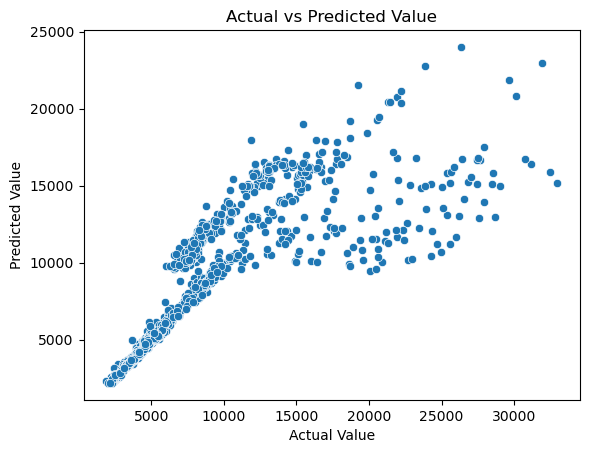

In [58]:
sns.scatterplot(data=residual_df, x='Actual Value', y='Predicted Value')
plt.title('Actual vs Predicted Value')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

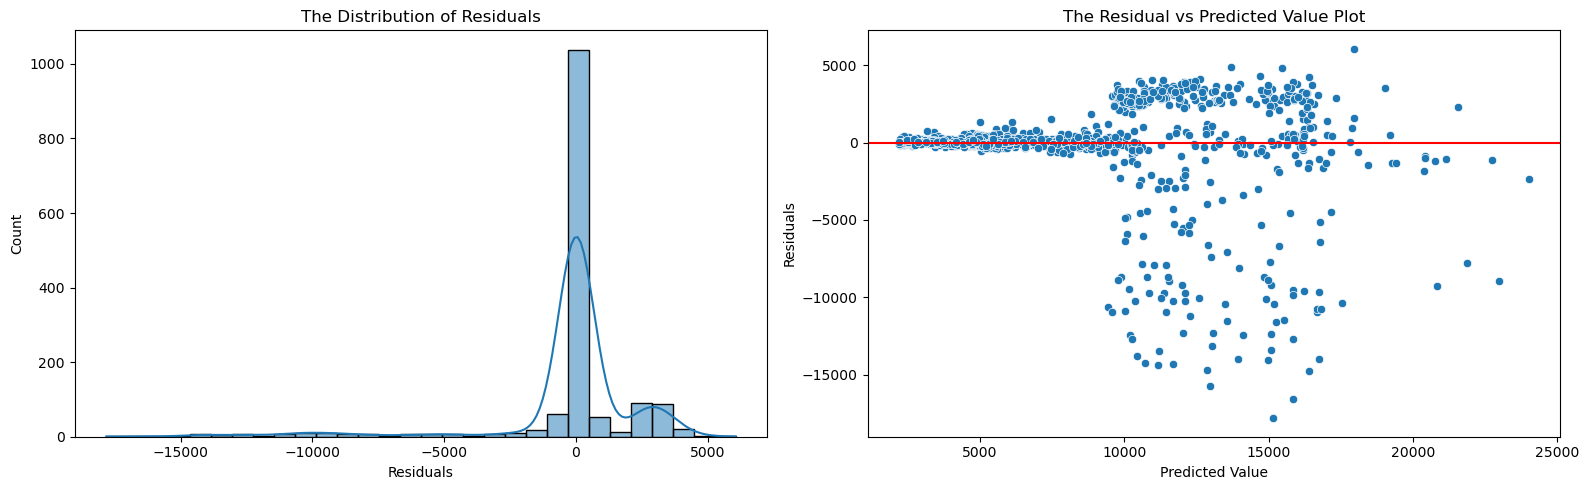

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sns.scatterplot(data=residual_df, x='Predicted Value', y='Residuals', ax=ax2)
ax2.axhline(0, color='red', linestyle='-')
ax2.set_title('The Residual vs Predicted Value Plot')
ax2.set_xlabel('Predicted Value')
ax2.set_ylabel('Residuals')

sns.histplot(data=residual_df, x='Residuals', bins=30, kde=True, ax=ax1)
ax1.set_title('The Distribution of Residuals')
ax1.set_xlabel('Residuals')
ax1.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [60]:
# Residual Analysis on CLV as target variable
log_residual = np.log(y_pred) - np.log(y_test)
log_residual_df = pd.DataFrame({'Predicted Value': np.log(y_pred), 'Residuals': log_residual})

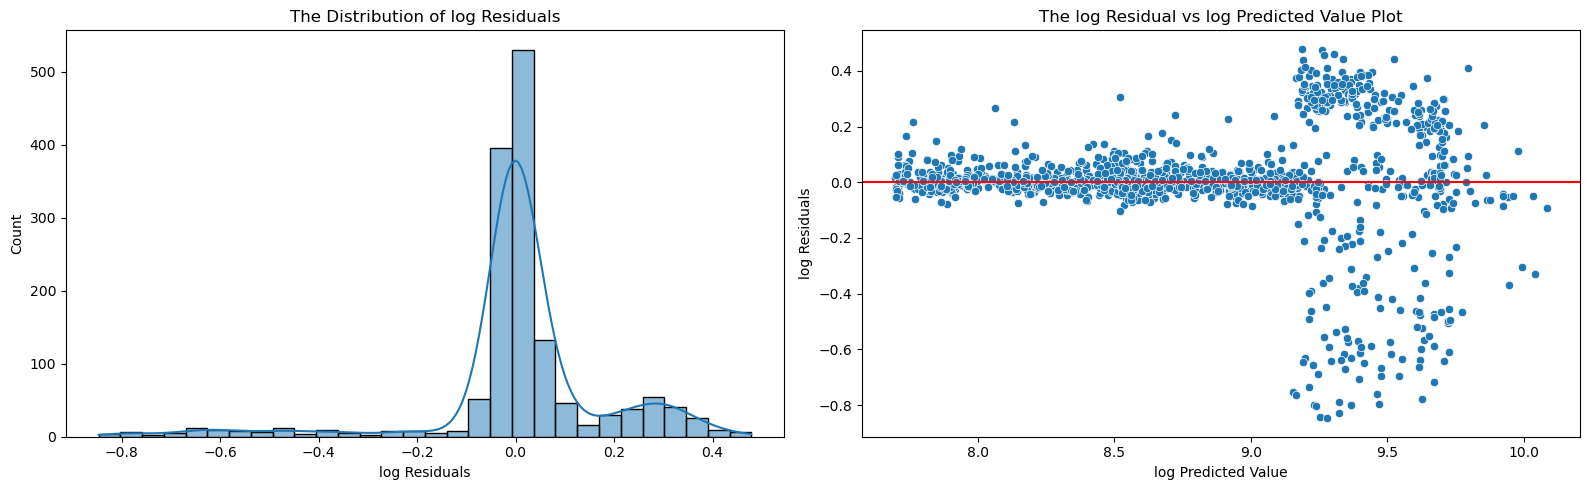

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sns.scatterplot(data=log_residual_df, x='Predicted Value', y='Residuals', ax=ax2)
ax2.axhline(0, color='red', linestyle='-')
ax2.set_title('The log Residual vs log Predicted Value Plot')
ax2.set_xlabel('log Predicted Value')
ax2.set_ylabel('log Residuals')

sns.histplot(data=log_residual_df, x='Residuals', bins=30, kde=True, ax=ax1)
ax1.set_title('The Distribution of log Residuals')
ax1.set_xlabel('log Residuals')
ax1.set_ylabel('Count')

plt.tight_layout()
plt.show()

Observations: 
-  Actual vs Predicted Value: The points closely follow the diagonal line, especially at lower values. This suggests good model performance in predicting lower-range Customer Lifetime Values (CLV). There’s some dispersion in higher values, which is expected due to fewer data points and increased variance in high-CLV customers.
- Residuals vs Predicted Value: Residuals are scattered relatively symmetrically around zero for lower predicted values, though there’s some funnel shape (increasing spread) at higher predicted values. This indicates mild heteroscedasticity, meaning the variance of the residuals increases with the predicted value. However, it’s not extreme, so the model remains fairly reliable.
- Residual Distribution: The residuals are mostly centered around 0 with a moderately long left tail. This indicates slightly left-skewed errors, but the bulk of the residuals follow a near-normal pattern, which is acceptable in real-world data.
- Log Residuals: The residuals in log space are more tightly clustered around zero and more homoscedastic. This confirms that the log transformation on the target was a good choice, because it helped stabilize variance and reduce skewness, improving model performance and interpretability.
- So, this model is statistically reliable and valid for use — particularly for lower to medium-value predictions.

### Model Interpretation

**Features Importances**

In [62]:
CLV_inner_model = log_gb.regressor_
CLV_importances = CLV_inner_model.feature_importances_
CLV_features_names = gb_pipeline.named_steps['preprocessor'].get_feature_names_out()
CLV_importances_df = pd.DataFrame({'Feature': CLV_features_names, 'Importance': CLV_importances})
CLV_importances_df = CLV_importances_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
CLV_importances_df

Feature  Importance
0                       remainder__Number of Policies    0.747651
1                     numerical__Monthly Premium Auto    0.118546
2                   numerical__Monthly Premium Auto^3    0.080881
3                   numerical__Monthly Premium Auto^2    0.022478
4            numerical__Monthly Premium Auto Income^2    0.008932
5   numerical__Monthly Premium Auto Total Claim Am...    0.004856
6                                 numerical__Income^3    0.002009
7                                   numerical__Income    0.002008
8            numerical__Monthly Premium Auto^2 Income    0.001495
9                numerical__Total Claim Amount Income    0.001366
10                  onehot__EmploymentStatus_Employed    0.001326
11                                numerical__Income^2    0.001187
12             numerical__Total Claim Amount^2 Income    0.001065
13  numerical__Monthly Premium Auto Total Claim Am...    0.000773
14                                 ordinal__Education    0.000696
15                    numerical__Total Claim Amount^2    0.000615
16                    numerical__Total Claim Amount^3    0.000543
17             numerical__Total Claim Amount Income^2    0.000542
18             numerical__Monthly Premium Auto Income    0.000533
19                     onehot__Marital Status_Married    0.000506
20  numerical__Monthly Premium Auto Total Claim Am...    0.000504
21  numerical__Monthly Premium Auto^2 Total Claim ...    0.000474
22                      numerical__Total Claim Amount    0.000415
23                      onehot__Marital Status_Single    0.000281
24                    onehot__Renew Offer Type_Offer2    0.000086
25                    onehot__Renew Offer Type_Offer3    0.000075
26                    onehot__Renew Offer Type_Offer4    0.000063
27                 onehot__Vehicle Class_Two-Door Car    0.000032
28             onehot__EmploymentStatus_Medical Leave    0.000028
29                   onehot__EmploymentStatus_Retired    0.000025
30                onehot__EmploymentStatus_Unemployed    0.000011
31                                  ordinal__Coverage    0.000000
32                   onehot__Vehicle Class_Sports Car    0.000000
33                          onehot__Vehicle Class_SUV    0.000000
34                   onehot__Vehicle Class_Luxury SUV    0.000000
35                   onehot__Vehicle Class_Luxury Car    0.000000

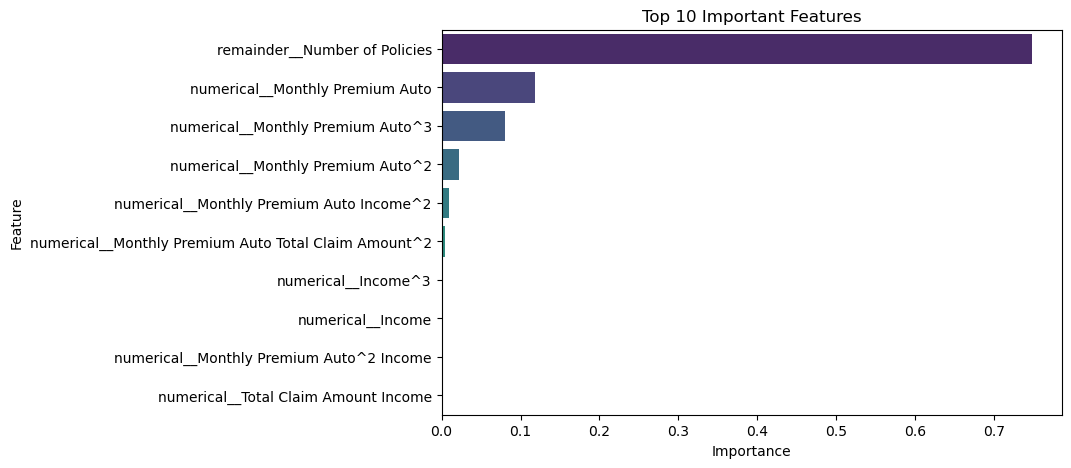

In [63]:
plt.figure(figsize=(8, 5))
sns.barplot(data=CLV_importances_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Observations:
- The most influential feature in the Gradient Boosting model is Number of Policies, which shows a dominant impact on the prediction of Customer Lifetime Value (CLV).
- The next most important set of features relates to Monthly Premium Auto, including the original value and its polynomial transformations (squared and cubed). This highlights the non-linear relationship between Monthly Premium Auto and CLV, which aligns well with insights gathered during EDA.
- Additional influential features include interaction terms involving Monthly Premium Auto with Total Claim Amount and Income, suggesting that the combined effects of these variables play a meaningful role in predicting CLV.
- Income itself and its polynomial forms also appear in the top features, further confirming its relevance, albeit to a lesser extent than the others.
- Overall, the top features confirm patterns identified during the exploratory phase, reinforcing the interpretability and trustworthiness of the Gradient Boosting model.

**SHAP**

In [64]:
# Extract preprocessed steps on pipeline
X_preprocessed = gb_pipeline.named_steps['preprocessor'].transform(X_test)

# Extract model on pipeline
model = gb_pipeline.named_steps['model'].regressor_

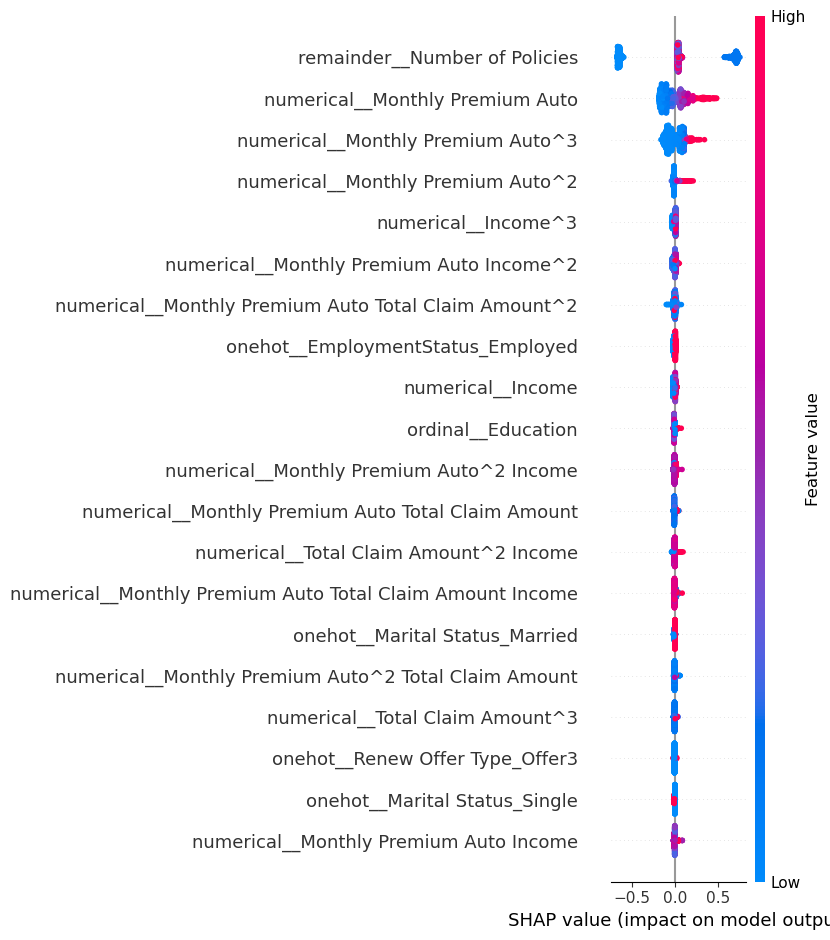

In [65]:
# Using SHAP to explain the model
explainer = shap.TreeExplainer(model, X_preprocessed)
shap_values = explainer(X_preprocessed)
shap.summary_plot(shap_values, X_preprocessed, feature_names=gb_pipeline.named_steps['preprocessor'].get_feature_names_out())

Observations:
- The SHAP summary plot confirms the feature importance rankings observed in the Gradient Boosting model, with Number of Policies and Monthly Premium Auto standing out as the most impactful predictors of Customer Lifetime Value (CLV).
- Monthly Premium Auto has a strong positive impact on CLV. Higher values of this feature are associated with an increase in predicted CLV, which is consistent with the patterns identified in the earlier EDA.
- The impact of Number of Policies is more nuanced. Lower values of this feature (e.g., 1 or 2 policies) can lead to either higher or lower CLV, indicating variability in customer behavior within this range. Meanwhile, higher values (3 or more) generally have minimal to no impact on CLV, which aligns with the earlier finding that CLV tends to drop off once the number of policies exceeds a certain threshold.
- Overall, the SHAP analysis strengthens the interpretability of the model by validating the relationships uncovered during EDA and model training, particularly for these key features.

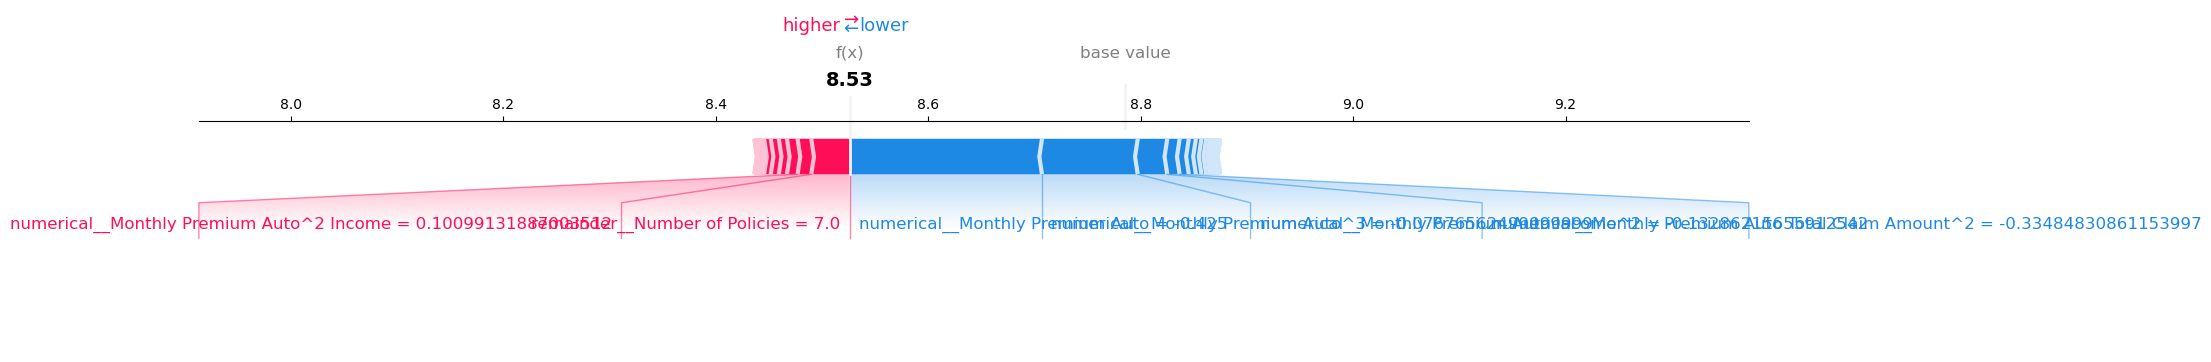

In [66]:
shap.plots.force(
    explainer.expected_value,
    shap_values[12].values,
    X_preprocessed[12],
    feature_names=gb_pipeline.named_steps['preprocessor'].get_feature_names_out(),
    matplotlib=True
)

Observations:
- Prediction = 8.53
- Base value = 8.8, so the model predicted a slightly lower-than-average CLV (log-transformed).
- The largest positive contributor is Number of Policies = 7.0. But interestingly, this pushes the value up slightly.
- However, this is overpowered by strong negative contributors, mainly Monthly Premium Auto^3 (cubic term)
- Even though Number of Policies is high (7), the interaction effects and high values of Monthly Premium Auto (in polynomial forms) actually pull the prediction down, meaning this combination may signal inefficiency or outlier behavior.
- This local features importances in index 12 is quite different with the global features importances in Gradien Boosting and SHAP

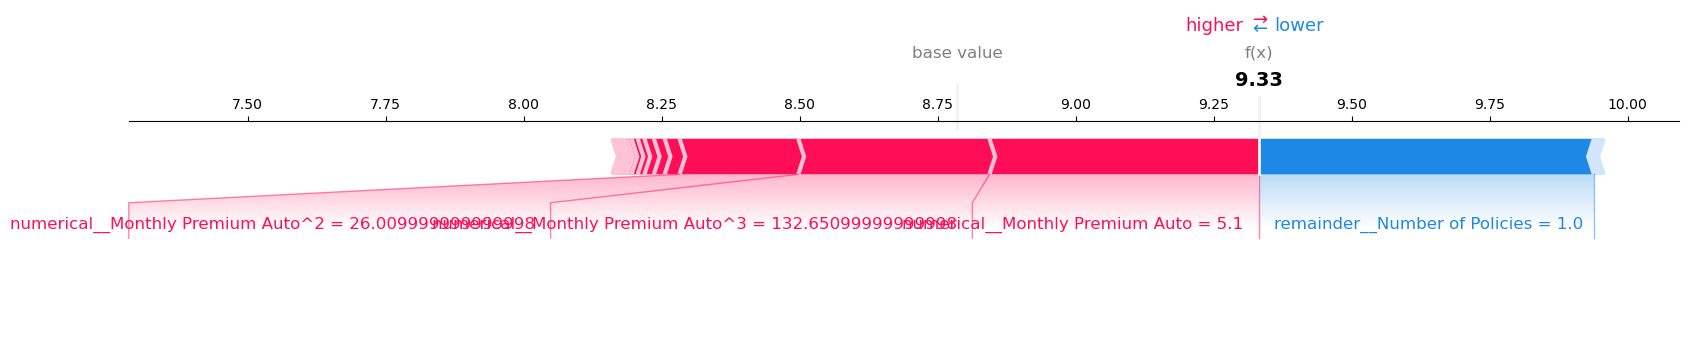

In [67]:
shap.plots.force(
    explainer.expected_value,
    shap_values[47].values,
    X_preprocessed[47],
    feature_names=gb_pipeline.named_steps['preprocessor'].get_feature_names_out(),
    matplotlib=True
)

Observations: 
- Prediction = 9.33, which is above the base value.
- This customer only has 1 policy, which contributes negatively (blue bar), but Monthly Premium Auto (in original, squared, and cubic forms) contributes strongly and positively. These values overpower the negative effect of low policy count
- Even though this customer has only 1 policy, the high premium makes them valuable, hence higher CLV
- This local SHAP in index 47 is also interesting where having only 1 policy still could lead this index to have high predicted CLV


### Post Model Analytic : Understanding Top 20% Customer

In [68]:
# Prediction dataframe
prediction_df = X_test.copy()
prediction_df['Customer Lifetime Value Prediction'] = y_pred
prediction_df.reset_index(drop=True, inplace=True)

# Top 20% of Customer Lifetime Value
top_customer = prediction_df[prediction_df['Customer Lifetime Value Prediction']>=np.quantile(prediction_df['Customer Lifetime Value Prediction'], 0.8)]
top_customer.head(10)

Vehicle Class  Coverage Renew Offer Type EmploymentStatus Marital Status  \
0   Four-Door Car  Extended           Offer1       Unemployed         Single   
2    Two-Door Car   Premium           Offer2    Medical Leave       Divorced   
8   Four-Door Car   Premium           Offer3       Unemployed        Married   
21            SUV     Basic           Offer2    Medical Leave        Married   
26  Four-Door Car  Extended           Offer3       Unemployed         Single   
27            SUV   Premium           Offer3       Unemployed        Married   
33   Two-Door Car   Premium           Offer1       Unemployed         Single   
47     Luxury SUV   Premium           Offer4         Employed        Married   
51     Luxury SUV   Premium           Offer1          Retired       Divorced   
52     Luxury SUV     Basic           Offer1         Employed         Single   

               Education  Number of Policies  Monthly Premium Auto  \
0                College                 2.0                  94.0   
2                College                 2.0                 115.0   
8               Bachelor                 2.0                 113.0   
21  High School or Below                 2.0                 100.0   
26              Bachelor                 2.0                  78.0   
27  High School or Below                 3.0                 165.0   
33               College                 2.0                 116.0   
47                Doctor                 1.0                 285.0   
51               College                 8.0                 256.0   
52              Bachelor                 5.0                 181.0   

    Total Claim Amount   Income  Customer Lifetime Value Prediction  
0           807.168846      0.0                        13605.155288  
2           552.000000  12439.0                        15380.904956  
8           217.926320      0.0                        14994.092063  
21          480.000000  28513.0                        14760.018022  
26          561.600000      0.0                        12062.830917  
27          792.000000      0.0                        12431.871085  
33          835.200000      0.0                        15173.176920  
47          540.141566  45354.0                        11284.737584  
51         1228.800000  26000.0                        17807.984091  
52          868.800000  42780.0                        13922.930356

In [69]:
prediction_df[prediction_df['Customer Lifetime Value Prediction']==5126.055188966148]

Vehicle Class  Coverage Renew Offer Type EmploymentStatus Marital Status  \
682           SUV  Extended           Offer2          Retired       Divorced   

                Education  Number of Policies  Monthly Premium Auto  \
682  High School or Below                 1.0                 133.0   

     Total Claim Amount   Income  Customer Lifetime Value Prediction  
682               638.4  20993.0                         5126.055189

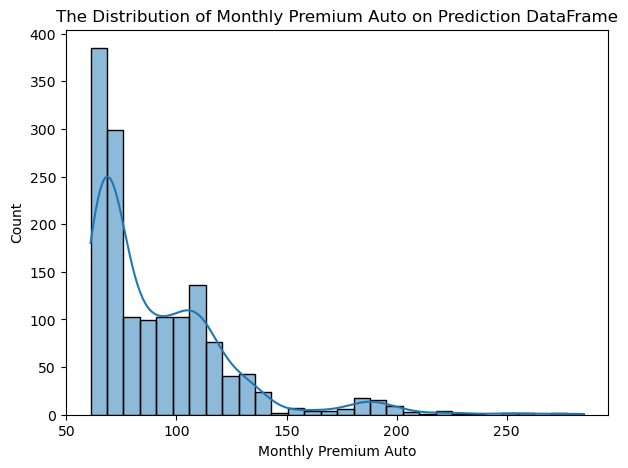

In [70]:
plt.figure(figsize=(7, 5))
sns.histplot(data=prediction_df, x='Monthly Premium Auto', bins=30, kde=True)
plt.title('The Distribution of Monthly Premium Auto on Prediction DataFrame')
plt.xlabel('Monthly Premium Auto')
plt.ylabel('Count')
plt.show()

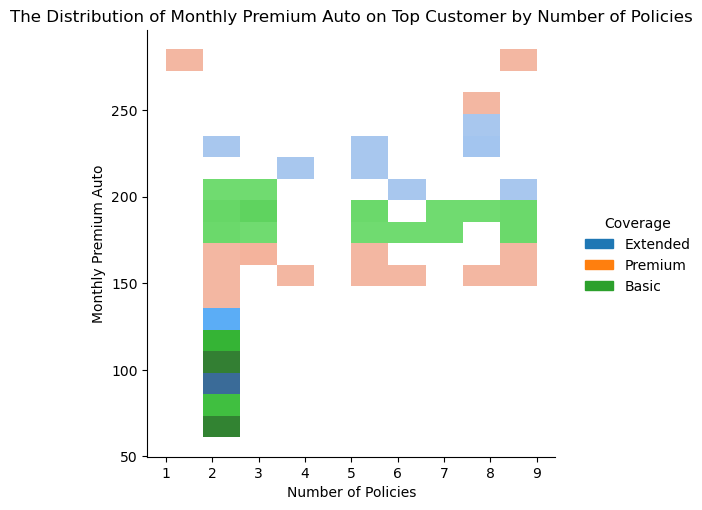

In [71]:
sns.displot(data=top_customer, x='Number of Policies', y='Monthly Premium Auto', hue='Coverage')
plt.title('The Distribution of Monthly Premium Auto on Top Customer by Number of Policies')
plt.show()

## Conclusion & Recommendation

### Conclusion
- The best-performing model in this project is Gradient Boosting (before hyperparameter tuning). It achieved a MAPE of 0.08% on the training set and 9.7% on the test set, which indicates excellent predictive accuracy, as MAPE below 10% is generally considered very good. The model also explains approximately 75% of the variance (R-squared) in the training data and 74% in the test data, suggesting strong and consistent predictive power. After hyperparameter tuning, performance declined due to overfitting, which reinforces the decision to use the pre-tuned model.
- The relationship between predicted and actual CLV shows a clear trend overall, but becomes more scattered for higher CLV values. Residual analysis confirms this pattern: for lower predicted values, residuals cluster closely around zero, but for higher predictions, the residuals become more dispersed. Additionally, the residual distribution is left-skewed, suggesting the model tends to underpredict some high-CLV customers, even after log transformation.
- This behavior is likely due to extreme outliers in the CLV distribution. While high CLV is valuable for the business, such cases are rare in the dataset. The model struggles to generalize well for these customers because of insufficient training examples in that range. As a result, prediction performance drops when CLV exceeds 10,000. To improve this, the company should collect more data from high-CLV customers to better train the model in this segment.
- In terms of feature importance, Number of Policies is the most influential predictor in both Gradient Boosting’s feature importance and SHAP analysis. However, SHAP provides more nuance, revealing that a low number of policies can either strongly increase or decrease CLV, depending on the context. Interestingly, having more than two policies does not significantly boost CLV. This finding contradicts the naive interpretation that “more policies = higher CLV,” which might be inferred from Gradient Boosting alone. Combining SHAP and EDA findings, we conclude that 2 policies is the optimal number for high CLV.
- The second most important feature is Monthly Premium Auto, which appears in various polynomial transformations (cubic, quadratic, and interaction terms). SHAP consistently shows a positive relationship—higher premiums are associated with higher predicted CLV.
- The third most influential feature is Income, also positively associated with CLV based on both Gradient Boosting and SHAP.
- Among categorical features, SHAP highlights Employment Status (Employed) and higher levels of Education as positively impacting CLV. Gradient Boosting also emphasizes higher levels of Coverage and Marital Status (Married).
- Finally, it’s important to note that while global feature importance identifies general trends, individual predictions may differ. SHAP values demonstrate that key drivers of CLV can vary by customer, reinforcing the value of personalized analysis in customer strategy.

### Recommendation:
1.  Target High-Value Segments for Customer Acquisition who following characteristics:
    - Willingness to hold two or more policies
    - Commitment to a Monthly Premium Auto of $150 or more
    - Selection of Extended or Premium coverage
    - Belonging to favorable demographics: Employed, Married, Vehicle Class: Luxury SUV or Luxury Car, Education Level: Bachelor’s degree or higher
    These attributes align closely with customers predicted to have high CLV, as identified through model predictions and SHAP value analysis.
2. Encourage Cross-Selling for Current Customers with Only One Policy
    - Customers holding only one policy should be prioritized for cross-sell campaigns. Based on both SHAP values and model feature importances, the Number of Policies is a key driver of Customer Lifetime Value (CLV). 
    - However, the relationship is non-linear because our analysis reveals that CLV peaks at two policies, with negative returns beyond that point. Thus, recommending one additional policy to customers with only one could meaningfully improve their CLV without risking overextension.
3. Upsell to Higher Coverage or Premiums for Customers with 3 and more Policies
    - For customers already holding three or more policies, CLV no longer increases—and in many cases, it declines. Instead of promoting more policies, the focus should shift to upselling—either by enhancing coverage or increasing their Monthly Premium Auto. 
    - The top-CLV customer distribution shows that none of the high-value customers with 3 or more policies have a Monthly Premium Auto below $150, suggesting that policy value, not quantity, drives high CLV in this segment.
4. Prioritize Offers with Monthly Premium Auto Above $100
    - SHAP analysis consistently shows that higher Monthly Premium Auto values correlate positively with CLV. While $100 may seem arbitrary, it is supported by a secondary peak in the overall premium distribution near this value, suggesting a large group of customers is already comfortable at or above this threshold. 
    - Many top CLV customers are well above this value, particularly those with multiple policies.


# Save The Model

In [72]:
# Save the model
pickle.dump(gb_pipeline, open('gb_pipeline.sav', 'wb'))

In [73]:
# Load the model
loaded_model = pickle.load(open('gb_pipeline.sav', 'rb'))

In [74]:
root_mean_squared_error(y_test, loaded_model.predict(X_test))

2777.259586880428